# 1. Importing the clean data

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(color_codes=True)

from scipy import stats

In [ ]:
dtypes = {
    'tconst':'object',
    'titleType': 'category',
    'primaryTitle':'object',
    'originalTitle':'object',
    'isAdult':'bool',
    'startYear':'Int32',
    'endYear':'Int32',
    'runtimeMinutes':'Int32',
    'directors':'string',
    'writers':'string',
    'averageRating':'float64',
    'numVotes':'Int32'
}
df = pd.read_csv(
    'data/final.csv',
    index_col='tconst',
    dtype=dtypes,
    converters={'genres': lambda x: [int(i.strip()) for i in x[1:-1].split(',')] }
)

In [ ]:
df.head()

In [ ]:
genres = [
    '<No genre>',
    'Action',
    'Adult',
    'Adventure',
    'Animation',
    'Biography',
    'Comedy',
    'Crime',
    'Documentary',
    'Drama',
    'Family',
    'Fantasy',
    'Film-Noir',
    'Game-Show',
    'History',
    'Horror',
    'Music',
    'Musical',
    'Mystery',
    'News',
    'Reality-TV',
    'Romance',
    'Sci-Fi',
    'Short',
    'Sport',
    'Talk-Show',
    'Thriller',
    'War',
    'Western'
 ] 

# 2. Getting the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)


In [2]:
titles = pd.read_csv('data/title.basics.tsv', delimiter='\t')

titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658791 entries, 0 to 9658790
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         int64 
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(1), object(8)
memory usage: 663.2+ MB


In [4]:
crew = pd.read_csv('data/title.crew.tsv', sep='\t', dtype='string')

crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [5]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658791 entries, 0 to 9658790
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     string
 1   directors  string
 2   writers    string
dtypes: string(3)
memory usage: 221.1 MB


In [6]:
ratings = pd.read_csv('data/title.ratings.tsv', sep='\t')
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1956
1,tt0000002,5.8,263
2,tt0000003,6.5,1789
3,tt0000004,5.6,179
4,tt0000005,6.2,2592


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284907 entries, 0 to 1284906
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1284907 non-null  object 
 1   averageRating  1284907 non-null  float64
 2   numVotes       1284907 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 29.4+ MB


In [8]:
episodes = pd.read_csv('data/title.episode.tsv', sep='\t')
episodes.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [9]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321676 entries, 0 to 7321675
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   parentTconst   object
 2   seasonNumber   object
 3   episodeNumber  object
dtypes: object(4)
memory usage: 223.4+ MB


# 3. Cleaning the data

In [10]:
titles.replace(r'\N', pd.NA, inplace=True)
titles.isAdult.replace({'0': False, '1': True}, inplace=True)
titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short"


In [11]:
titles.genres.fillna('<No genre>', inplace=True)
titles.runtimeMinutes.fillna('0', inplace=True)

In [12]:
# Added because we had a conversion error for runtimeMinutes
# The error was due to mistakingly placed double quotes on some of the data rows
# The fix was done inside the dataset

titles[~titles.runtimeMinutes.str.isnumeric()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


In [13]:
titles['isAdult'] = titles.isAdult.astype(bool)
titles['startYear'] = titles.startYear.astype("Int32")
titles['endYear'] = titles.endYear.astype("Int32")
titles['runtimeMinutes'] = titles.runtimeMinutes.astype("Int32")
titles['genres'] = titles.genres.astype(str)
titles['titleType'] = titles.titleType.astype("category")

In [14]:
genres = set()

for values in titles.genres.values:
    genre_list = values.strip().split(',')
    genres.update(genre_list)
    
genres = list(genres)
genres.sort()
genres

['<No genre>',
 'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [15]:
def convert_genres(x: str):
    return tuple(genres.index(i) for i in x.strip().split(','))

titles['genres'] = titles.genres.apply(convert_genres)

In [16]:
titles.set_index('tconst', inplace=True)

In [17]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658791 entries, tt0000001 to tt9916880
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   titleType       category
 1   primaryTitle    object  
 2   originalTitle   object  
 3   isAdult         bool    
 4   startYear       Int32   
 5   endYear         Int32   
 6   runtimeMinutes  Int32   
 7   genres          object  
dtypes: Int32(3), bool(1), category(1), object(3)
memory usage: 451.4+ MB


In [18]:
titles.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,False,1894,<NA>,1,"(8, 23)"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,False,1892,<NA>,5,"(4, 23)"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,False,1892,<NA>,4,"(4, 6, 21)"
tt0000004,short,Un bon bock,Un bon bock,False,1892,<NA>,12,"(4, 23)"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,False,1893,<NA>,1,"(6, 23)"


In [19]:
crew.replace(r'\N', pd.NA, inplace=True)
crew.set_index('tconst', inplace=True)
crew.head()

,directors,writers
tconst,,
tt0000001,nm0005690,<NA>
tt0000002,nm0721526,<NA>
tt0000003,nm0721526,<NA>
tt0000004,nm0721526,<NA>
tt0000005,nm0005690,<NA>


In [20]:
ratings.replace(r'\N', pd.NA, inplace=True)

ratings.isna().astype(int).sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [21]:
ratings.set_index('tconst', inplace=True)

In [22]:
ratings.head()

,averageRating,numVotes
tconst,,
tt0000001,5.7,1956
tt0000002,5.8,263
tt0000003,6.5,1789
tt0000004,5.6,179
tt0000005,6.2,2592


In [23]:
episodes.replace(r'\N', pd.NA, inplace=True)

episodes.isna().astype(int).sum()

tconst                 0
parentTconst           0
seasonNumber     1515564
episodeNumber    1515564
dtype: int64

In [24]:
episodes['seasonNumber'] = episodes.seasonNumber.astype('Int32')
episodes['episodeNumber'] = episodes.episodeNumber.astype('Int32')

In [25]:
episodes.set_index('tconst', inplace=True)

Note: there are 3 (movies/tvMovies/videos) that don't have the **startYear** in the dataset but on IMDB they do:
 - "Taal"
 - "Hum Ho Gaye Aap Ke"
 - "Madam Chief Minister"

For these we've added the **startYear** inside the dataset by hand.

In [26]:
df = titles.join(crew, how='inner').join(ratings, how='inner').join(episodes, how='left')

df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber
tconst,,,,,,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,False,1894,<NA>,1,"(8, 23)",nm0005690,<NA>,5.7,1956,NaN,<NA>,<NA>
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,False,1892,<NA>,5,"(4, 23)",nm0721526,<NA>,5.8,263,NaN,<NA>,<NA>
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,False,1892,<NA>,4,"(4, 6, 21)",nm0721526,<NA>,6.5,1789,NaN,<NA>,<NA>
tt0000004,short,Un bon bock,Un bon bock,False,1892,<NA>,12,"(4, 23)",nm0721526,<NA>,5.6,179,NaN,<NA>,<NA>
tt0000005,short,Blacksmith Scene,Blacksmith Scene,False,1893,<NA>,1,"(6, 23)",nm0005690,<NA>,6.2,2592,NaN,<NA>,<NA>


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284907 entries, tt0000001 to tt9916880
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   titleType       1284907 non-null  category
 1   primaryTitle    1284907 non-null  object  
 2   originalTitle   1284907 non-null  object  
 3   isAdult         1284907 non-null  bool    
 4   startYear       1284659 non-null  Int32   
 5   endYear         44154 non-null    Int32   
 6   runtimeMinutes  1284907 non-null  Int32   
 7   genres          1284907 non-null  object  
 8   directors       1084847 non-null  string  
 9   writers         996191 non-null   string  
 10  averageRating   1284907 non-null  float64 
 11  numVotes        1284907 non-null  int64   
 12  parentTconst    625225 non-null   object  
 13  seasonNumber    610518 non-null   Int32   
 14  episodeNumber   610518 non-null   Int32   
dtypes: Int32(5), bool(1), category(1), float64(1), int64(1), obje

In [28]:
df.to_csv('data/final.csv')

# 4. Exploring the data

In [29]:
# Select a representative subset based on the number of votes
# - the titles that have a 'numVotes' >= 75% of the 'numVotes' in their title type

numVotesThreshold = df.groupby(by='titleType')['numVotes'].quantile(.75)

df = df[df.numVotes.values >= numVotesThreshold[df.titleType].values]

## 4.1. What title types do we have? How many of each are there?

In [30]:
count_types = df.titleType.value_counts()
count_types

tvEpisode       156663
movie            72049
short            36507
tvSeries         21488
tvMovie          12533
video            12211
tvMiniSeries      3646
videoGame         3586
tvSpecial         2732
tvShort            538
tvPilot              0
Name: titleType, dtype: int64

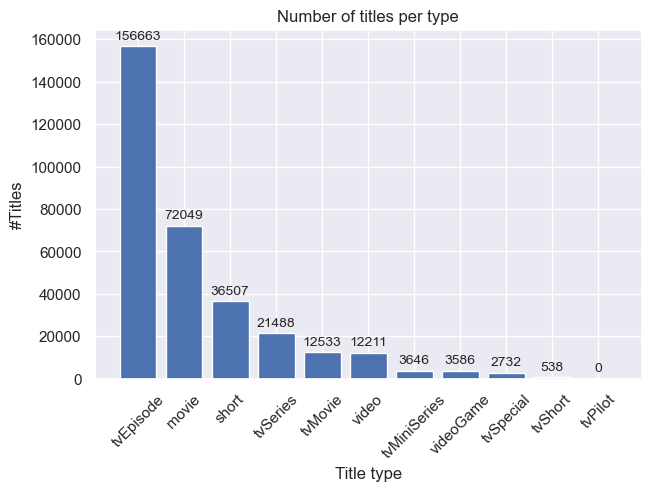

In [31]:
fig, ax = plt.subplots(layout='constrained')
bars = ax.bar(count_types.index, count_types.values)

for bar in bars:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset,
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_ylabel('#Titles')
ax.set_xlabel('Title type')
ax.set_title('Number of titles per type')

ax.tick_params(axis='x', rotation=45)

plt.show()

## 4.2. What is the distribution of ratings with respect to the movie types?

In [32]:
rating_types = df.groupby('titleType')['averageRating']
rating_types = [(k, v) for k, v in rating_types if len(v) != 0]

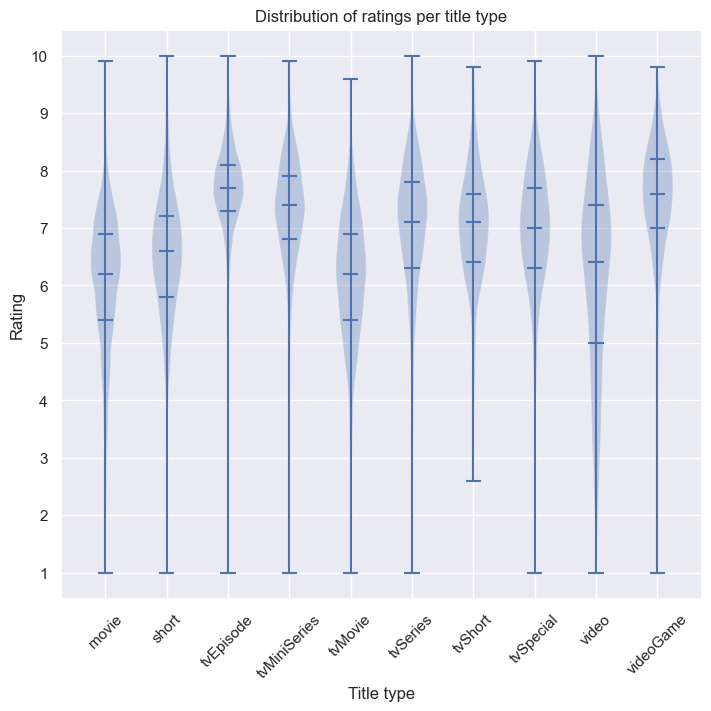

In [33]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(7, 7)

ax.violinplot([v for k, v in rating_types], showmedians=True, quantiles=[[0.25, 0.75] for _ in range(len(rating_types))])

ax.set_yticks(np.arange(1, 11))
ax.set_ylabel('Rating')

ax.set_xlabel('Title type')
ax.set_title('Distribution of ratings per title type')

ax.tick_params(axis='x', rotation=45)
ax.set_xticks(np.arange(1, len(rating_types) + 1))
ax.set_xticklabels([k for k, v in rating_types])

plt.show()

## 4.3 What is the average number of reviews per title type?

In [34]:
reviews_per_type = df.groupby('titleType')['numVotes']
sorted_mean_reviews_per_type = reviews_per_type.mean().dropna().sort_values(ascending=False)

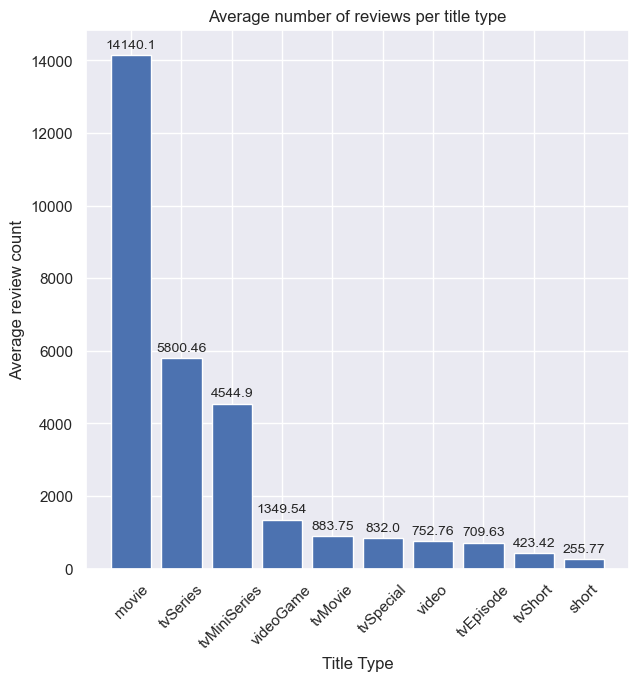

In [35]:
fig, ax = plt.subplots()

fig.set_size_inches(7, 7)

bars = ax.bar(sorted_mean_reviews_per_type.index, sorted_mean_reviews_per_type)

for bar in bars:
    height = bar.get_height()
    ax.annotate(
        round(height, 2),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.tick_params('x', rotation=45)
ax.set_xlabel('Title Type')

ax.set_ylabel('Average review count')

ax.set_title('Average number of reviews per title type')

plt.show()

# 5. Exploring the movies

In [36]:
short_index = genres.index('Short')
movies_df = df[(df.titleType == 'movie') | (df.titleType == 'tvMovie') & (df.genres.map(lambda g: short_index not in g))]

# Remove the movies that have a runtime of more than ~6h (they are impractical to watch)
# and those having a runtime of 0 (IMDB doesn't have a runtime for them)

movies_df = movies_df[(movies_df.runtimeMinutes > 0) & (movies_df.runtimeMinutes < 400)]
movies_df.drop(columns=['endYear', 'parentTconst', 'seasonNumber', 'episodeNumber'], inplace=True)

len(movies_df)

83842

In [37]:
movies_df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
tconst,,,,,,,,,,,
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,100,"(8, 19, 24)",nm0714557,<NA>,5.2,466
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,70,"(1, 3, 5)",nm0846879,nm0846879,6.0,815
tt0002101,movie,Cleopatra,Cleopatra,False,1912,100,"(9, 14)",nm0309130,"nm0765026,nm0309130",5.1,546
tt0002130,movie,Dante's Inferno,L'Inferno,False,1911,71,"(3, 9, 11)","nm0078205,nm0655824,nm0209738",nm0019604,7.0,3074
tt0002199,movie,From the Manger to the Cross,From the Manger to the Cross,False,1912,60,"(5, 9)",nm0646058,nm0310155,5.8,609


## 5.1. How many movies are for each genre? What genre has the most movies?

In [38]:
val, counts = np.unique(np.hstack(movies_df.genres.values), return_counts=True)

In [39]:
rev_idx = np.argsort(counts)[::-1]
desc_counts = counts[rev_idx]
desc_val = val[rev_idx]

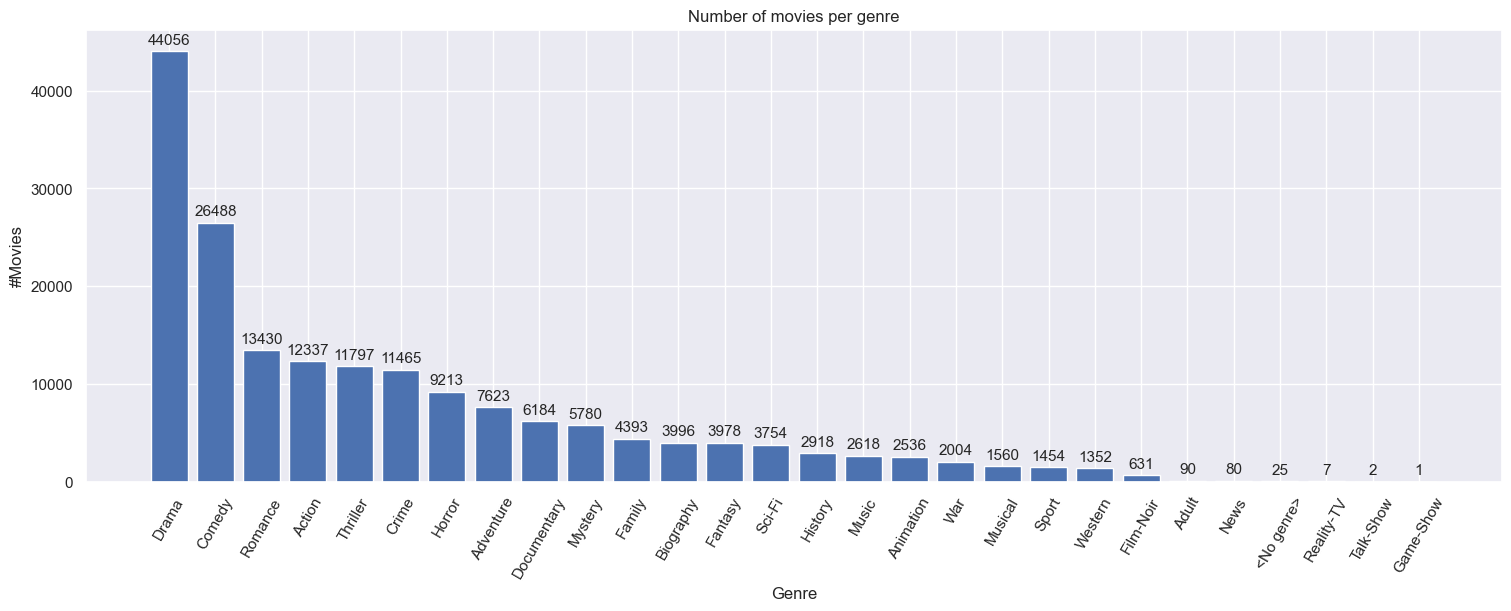

In [40]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(15, 6)

bars = ax.bar([genres[i] for i in desc_val], desc_counts)

for bar in bars:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=11
    )

ax.set_xlabel('Genre')
ax.tick_params(axis='x', rotation=60)

ax.set_ylabel('#Movies')
ax.set_title('Number of movies per genre')

plt.show()

In [41]:
# Remove the last 6 genres since their movie counts are very low (might not be statistically significant)

insignificant_genres = movies_df.genres.explode().value_counts()[-6:].index.values

movies_df = movies_df[movies_df.genres.apply(lambda genres: all([x not in insignificant_genres for x in genres]))]

## 5.2 What is the distribution of the number of reviews?

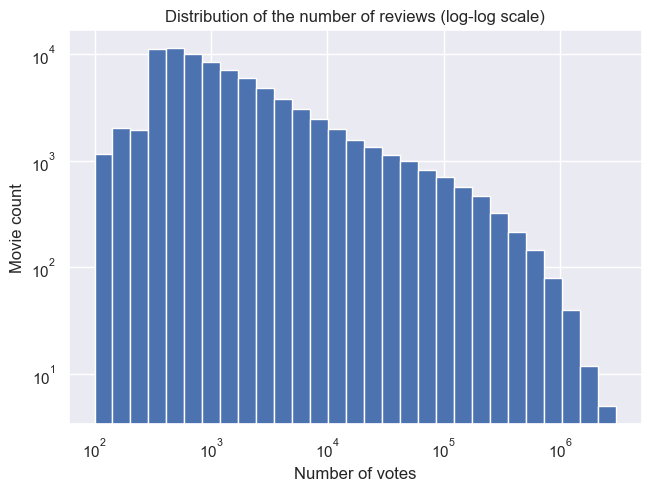

In [42]:
fig, ax = plt.subplots(layout='constrained')

xticks = np.geomspace(1e2, 3e6, 30, dtype=int)
ax.hist(movies_df.numVotes, bins=xticks)

ax.set_xscale('log')
ax.set_xlabel("Number of votes")

ax.set_yscale('log')
ax.set_ylabel("Movie count")

ax.set_title("Distribution of the number of reviews (log-log scale)")

plt.show()

## 5.3. What is the distribution of overall ratings?

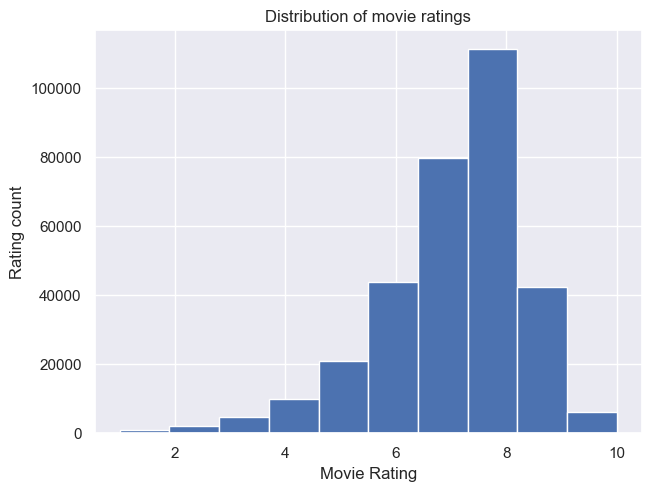

In [43]:
fig, ax = plt.subplots(layout='constrained')

ax.hist(df.averageRating)
ax.set_title('Distribution of movie ratings')

ax.set_xlabel('Movie Rating')
ax.set_ylabel('Rating count')

plt.show()

In [44]:
ratings = df.averageRating
ratings_std = ratings.std()
ratings_mean = ratings.mean()
ratings_mean, ratings_std

(6.979731513606024, 1.3044205784175191)

In [45]:
std_norm = np.random.normal(size=len(df.averageRating))
std_norm.sort()
ratings = np.sort(ratings)

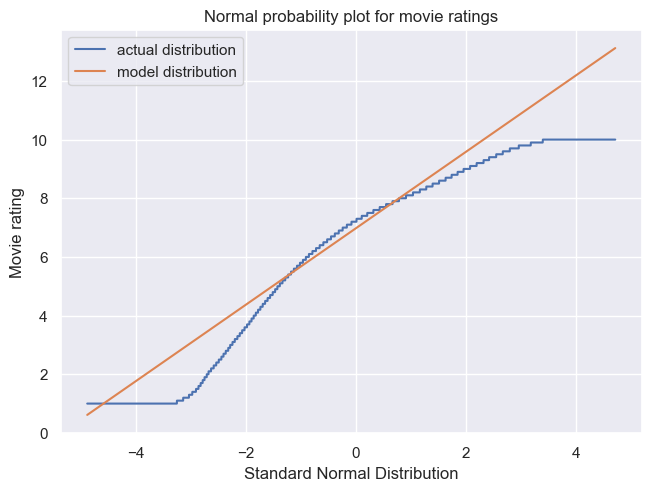

In [46]:
fig, ax = plt.subplots(layout='constrained')

ax.plot(std_norm, ratings, label='actual distribution')
ax.plot(std_norm, ratings_std * std_norm + ratings_mean, label='model distribution')

ax.set_xlabel('Standard Normal Distribution')
ax.set_ylabel('Movie rating')

ax.set_title('Normal probability plot for movie ratings')

ax.legend()
plt.show()

### 5.3.1. Conclusions

At a first glance the distribution looks normal, with a left skew.  
The distribution has a mean of 6.98 and a stddev of 1.3.
The normal probability plot [confirms](https://www.skymark.com/resources/tools/normal_test_plot.asp) the left skewness of the distribution and it shows that a normal distribution might not be a good fit for the ratings distribution.

## 5.4 How many movies were released per year?

In [47]:
data = movies_df.startYear.value_counts().sort_index().rolling(5).mean()

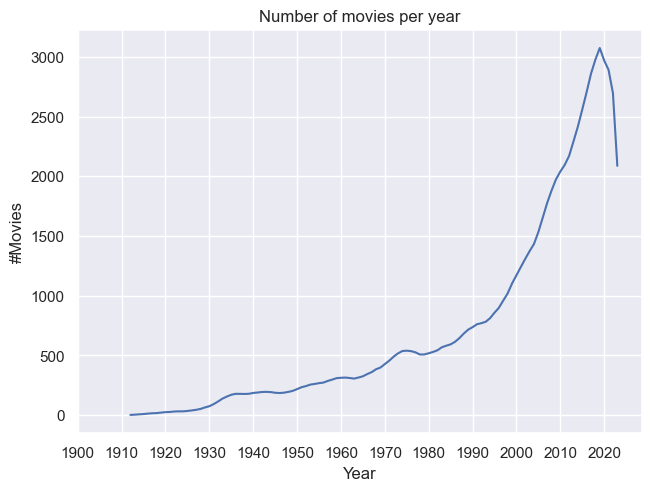

In [48]:
fig, ax = plt.subplots(layout='constrained')

ax.plot(data.index, data.values)

ax.set_xlabel('Year')
ax.set_xticks(np.arange(round(movies_df.startYear.min(), -1), round(movies_df.startYear.max()), 10))

ax.set_ylabel('#Movies')

ax.set_title('Number of movies per year')

plt.show()

## 5.5. What is the distribution of movie ratings per year?
<a id='movie_ratings_per_year'></a>

In [49]:
ratings_per_year = movies_df.groupby('startYear')['averageRating']

In [50]:
year_median = ratings_per_year.median().rolling(5).mean()
year_lower = ratings_per_year.quantile(.25).rolling(5).mean()
year_upper = ratings_per_year.quantile(.75).rolling(5).mean()

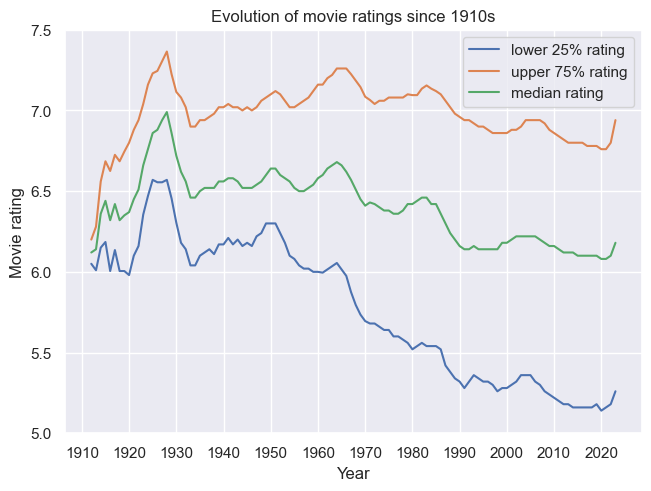

In [51]:
fig, ax = plt.subplots(layout='constrained')

ax.plot(year_lower, label='lower 25% rating')
ax.plot(year_upper, label='upper 75% rating')
ax.plot(year_median, label='median rating')

ax.legend()

ax.set_xticks(np.arange(1910, 2030, 10))
ax.set_xlabel('Year')

ax.set_yticks(np.arange(5, 8, .5))
ax.set_ylabel('Movie rating')

ax.set_title('Evolution of movie ratings since 1910s')

plt.show()

In [52]:
stats.kendalltau(movies_df.startYear, movies_df.averageRating)

KendalltauResult(correlation=-0.09369044935281007, pvalue=0.0)

### 5.5.1. Conclusions

There seems to be a downward trend in the ratings since the 1920s where it peaked.\
Although this downward trend might be caused by the increase in the volume of poor performing movies\
it could also be a biproduct of survivorship bias for the older movies since the IMDB website was launched in 1990.

Since the ratings in 1 year doesn't depend upon the ratings in previous years we're safe to use a general correlation test.

Performing the Kendall's tau-b test we can confirm that there's a weak negative correlation ($\tau=-0.093$) between\
the release year and movie's rating ($p=0.0$).

### 5.5.2 What about since IMDB was launched?

In [53]:
movies_after_imdb_release = movies_df[movies_df.startYear >= 1990]
ratings_per_year = movies_after_imdb_release.groupby('startYear')['averageRating']

In [54]:
year_median = ratings_per_year.median().rolling(5).mean()
year_lower = ratings_per_year.quantile(.25).rolling(5).mean()
year_upper = ratings_per_year.quantile(.75).rolling(5).mean()

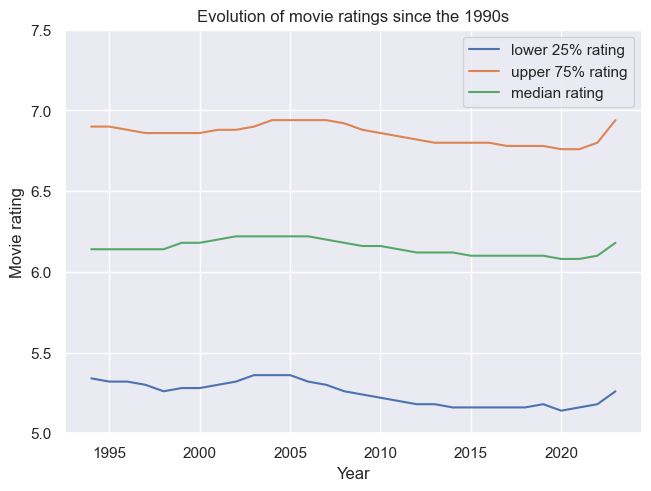

In [55]:
fig, ax = plt.subplots(layout='constrained')

ax.plot(year_lower, label='lower 25% rating')
ax.plot(year_upper, label='upper 75% rating')
ax.plot(year_median, label='median rating')

ax.legend()


ax.set_xlabel('Year')

ax.set_ylim(5, 7.5)
ax.set_ylabel('Movie rating')

ax.set_title('Evolution of movie ratings since the 1990s')

plt.show()

In [56]:
stats.kendalltau(movies_after_imdb_release.startYear, movies_after_imdb_release.averageRating)

KendalltauResult(correlation=-0.022606147947318415, pvalue=3.515455580157505e-16)

#### 5.5.2.1 Conclusions

The same downtrend is present here as well for the median and 75% of the data.\
The 25% is however descending until 2010 and then seems to follow an ascending trend.

The increase after 2020 is due to the contribution of 2023 for which only the first 3 months\
were available at the time the dataset was downloaded.

Performing the Kendall's tau-b test we can confirm that there's a weak negative correlation ($\tau=-0.022$) between\
the release year and movie's rating ($p=3.51e-16$).

## 5.6 What is the most/least rated genre? What is the difference between them?

In [57]:
ratings_per_genre = movies_df[['genres', 'averageRating']].explode('genres', ignore_index=True).groupby('genres')['averageRating']
ratings_per_genre.describe().head()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
1,12335.0,5.630807,1.369961,1.1,4.7,5.8,6.6,9.6
3,7615.0,5.868404,1.326588,1.0,5.2,6.1,6.8,9.4
4,2535.0,6.504931,1.124603,1.0,6.0,6.7,7.2,9.4
5,3987.0,6.805267,0.877595,1.0,6.4,6.9,7.4,9.8
6,26444.0,5.966075,1.163971,1.0,5.3,6.1,6.8,9.9


In [58]:
sorted_ratings_per_genre = sorted(ratings_per_genre, key=lambda x: x[1].count(), reverse=True)[:-6]
sorted_ratings_per_genre = sorted(sorted_ratings_per_genre, key=lambda x: x[1].mean(), reverse=True)

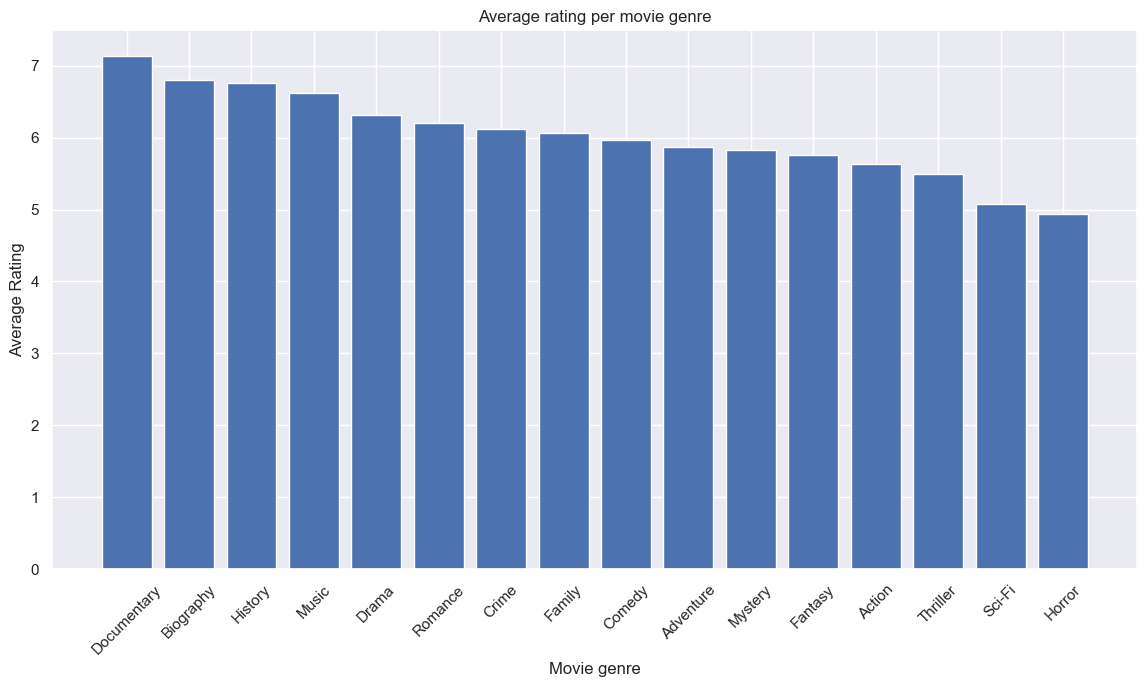

In [59]:
fig, ax = plt.subplots()

fig.set_size_inches(14, 7)

ax.bar(np.arange(len(sorted_ratings_per_genre)), [v.mean() for k, v in sorted_ratings_per_genre])

ax.tick_params(axis='x', rotation=45)
ax.set_xticks(np.arange(len(sorted_ratings_per_genre)))
ax.set_xticklabels(map(lambda x: genres[x], [k for k, v in sorted_ratings_per_genre]))
ax.set_xlabel('Movie genre')

ax.set_ylabel('Average Rating')

ax.set_title('Average rating per movie genre')

plt.show()

In [60]:
doc_mean_rating = ratings_per_genre.get_group(genres.index('Documentary')).mean()
horror_mean_rating = ratings_per_genre.get_group(genres.index('Horror')).mean()

print(round(doc_mean_rating, 2))
print(round(horror_mean_rating, 2))
round(doc_mean_rating - horror_mean_rating, 2)

7.14
4.94


2.2

### 5.6.1 Conclusions

The Documentary genre has the highest average rating with **7.14** on average.\
The Horror genre has the lowest average rating with **4.94** on average.\
There's an average difference of **2.2** rating points between their ratings.

In [61]:
from numpy.random import default_rng

def chisq(observed, expected, axis=0):
    return np.sum((observed - expected) ** 2 / expected, axis=axis)

def mc_chisquared(table, n=2000):
    """
    Performs the Chi-Squared test using a Monte Carlo simulation.
    Code based on the article [here](https://rinterested.github.io/statistics/monte_carlo_chi_square.html).

    Parameters:
        table (pd.DataFrame): contingency table on which the test is performed
        n (int): number of simulations to run (default: 2000)

    Returns:
        p (float): The p-value of the test.
    
    Example:
        >>> sales = pd.DataFrame([[2, 7], [1, 2]], index = ['buy', 'no-buy'], columns=['one_off', 'good_customer'])
        >>> mc_chisquared(sales)
    """
    nrow, ncol = table.shape
    ncells = nrow * ncol
    total_counts = table.sum().sum()
    
    p = (table.sum(axis=0) / total_counts).values  # The probabilities under the null hypothesis (column-wise)
    p = np.tile(p, nrow)  # duplicate the probs to match the numRows
    p = p / p.sum()  # normalize the probs so they sum to 1
    expected_vals = total_counts * p

    expected = np.tile(expected_vals, n).reshape(n, ncells)
    
    rng = default_rng()

    el = np.arange(ncells, dtype=int)
    simulations = rng.choice(el, (n, total_counts), replace=True, shuffle=False, p=p)

    # np.unique only counts the freqs. of existing items
    # the simulation is not guaranteed to pick all the items at least once
    # to account for the items with 0 freq. we add all the initial items once
    # and then subtract 1 from their freqs.
    
    initial = np.tile(el, n).reshape(n, ncells)
    bias = np.ones_like(el)

    data = np.hstack((initial, simulations))

    observed = np.asarray([(np.unique(row, return_counts=True)[1] - bias) for row in data])

    chi = chisq(observed, expected, axis=1)
    stat = chisq(table.values.flatten(), expected_vals)

    return (1 + np.sum(chi >= stat)) / (n + 1)

In [62]:
def cramers_v(x, y):
    '''
    Computes the Cramer's V coefficient for the given variables.
    The computation includes the bias correction described [here](https://en.wikipedia.org/wiki/Cram%C3%A9r's_V#Bias_correction)
    '''
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

## 5.7 What is the distribution of ratings per genre?

In [63]:
rating_per_genre = movies_df[['genres', 'averageRating']].explode('genres').groupby('genres')['averageRating']
rating_per_genre = [(genres[k], v) for k, v in rating_per_genre]

# sort descending by num movies per genre and discard the ones with least movies
sorted_rating_per_genre = sorted(rating_per_genre, key=lambda x: x[1].count(), reverse=True)[:-6]

# sort descending by averageRating per genre
sorted_rating_per_genre = sorted(sorted_rating_per_genre, key=lambda x: x[1].mean(), reverse=True)

keys = [k for k, _ in sorted_rating_per_genre]
values = [v for _, v in sorted_rating_per_genre]

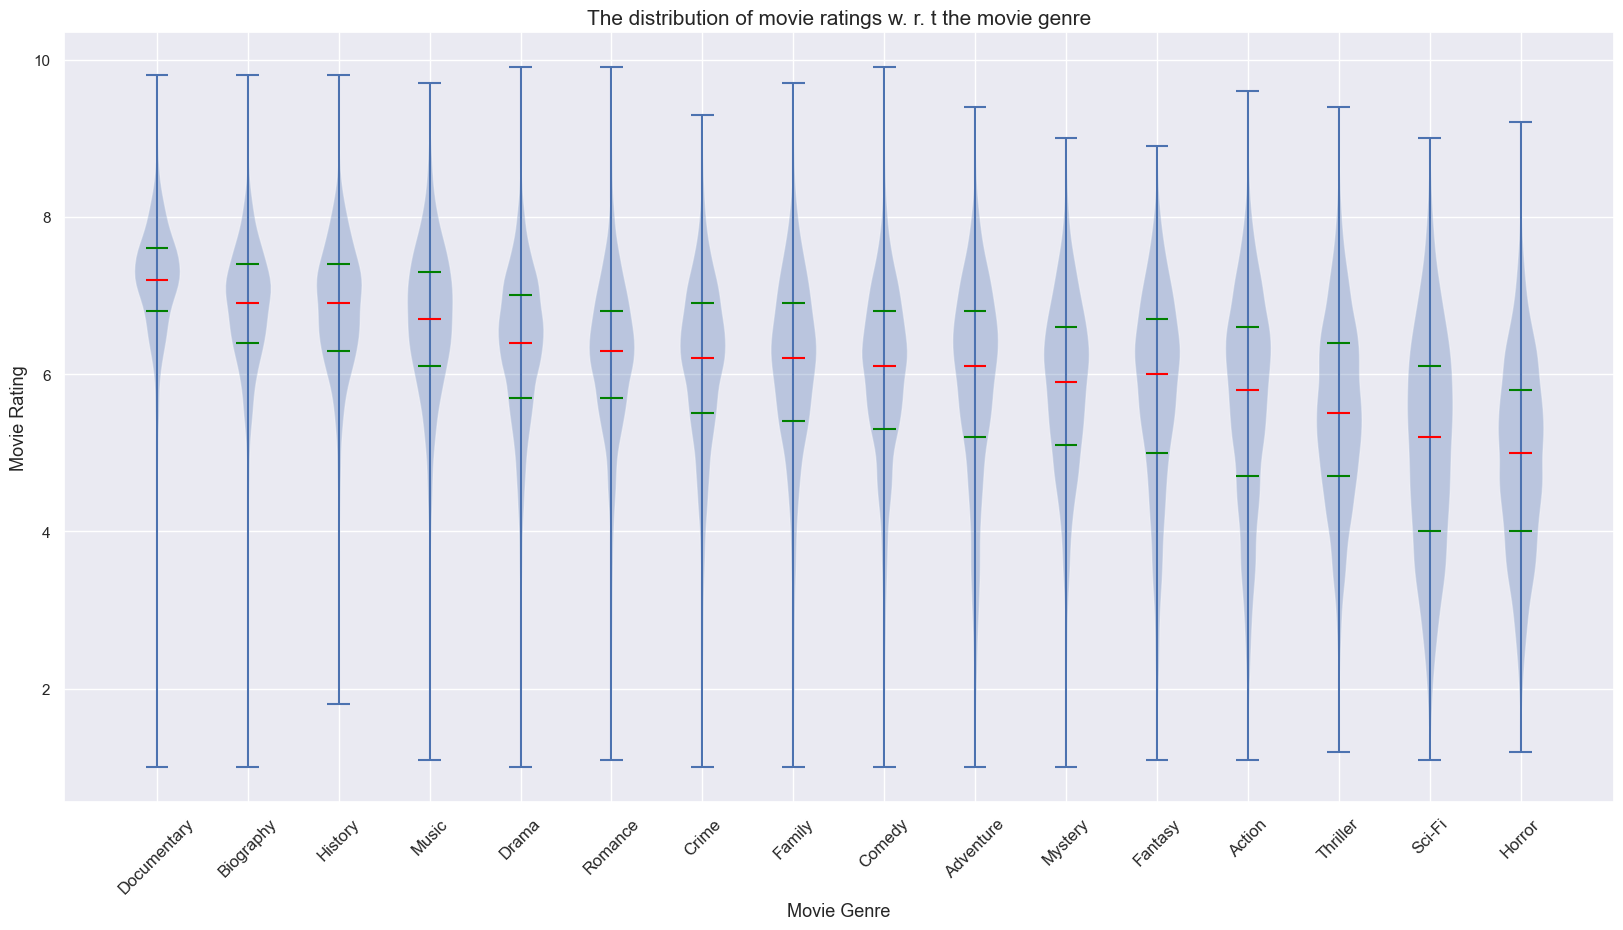

In [64]:
fig, ax = plt.subplots()

fig.set_size_inches(20, 10)

title_font_params = {'fontsize': 15}
label_font_params = {'fontsize': 13}

violin_data = ax.violinplot(values, showmedians=True, quantiles=[(.25, .75) for _ in range(len(values))])

violin_data['cmedians'].set_colors(['red'] * len(values))
violin_data['cquantiles'].set_colors(['green'] * len(values))

ax.set_xticks(np.linspace(1, len(values), len(values)), keys)
ax.tick_params('x', rotation=45, labelsize='medium')
ax.set_xlabel('Movie Genre', fontdict=label_font_params)

ax.set_ylabel('Movie Rating', fontdict=label_font_params)

ax.set_title("The distribution of movie ratings w. r. t the movie genre", fontdict=title_font_params)

plt.show()

In [65]:
ratings_per_genre = movies_df[['genres', 'averageRating']].explode('genres')

We have the following variables:

'genres' is a **categorical** variable that ranges between {0,..,28}\
'averageRating' is a **discrete** variable that takes decimal values in increments of 0.1 and ranges between {1,..,10}

Based on this it seems appropriate to choose a Chi-squared test to check for the correlation\
and use Cramer's V coeff. to asses the strength of the correlation.

In [66]:
cross_tab_result = pd.crosstab(ratings_per_genre.averageRating, ratings_per_genre.genres)

In [67]:
chi_val, p_value, _, expected = stats.chi2_contingency(cross_tab_result)

print(f'P-value is: {p_value}, chi squared: {chi_val}')

print(f'Percent of contingency table entries with counts < 5: {(expected < 5).sum() / np.prod(expected.shape) * 100:.2f}%')

P-value is: 0.0, chi squared: 37098.8289067912
Percent of contingency table entries with counts < 5: 29.04%


In [68]:
mc_chisquared(cross_tab_result)

0.0004997501249375312

In [69]:
cramers_v(ratings_per_genre.averageRating, ratings_per_genre.genres)

0.0967349179142246

### 5.7.1 Conclusions

A rule of thumb for the $\chi^2$ test is that the expected cell counts should be > 5 for each observation.\
In our case, 44.3% of the expected cell counts are < 5 so the standard $\chi^2$ test likely won't work.

To address that issue we've used the Monte-Carlo based $\chi^2$ test.\
From the test we get a p-value $p=0.0005$ and computing the Cramer's V coefficient we get $\tilde V=0.09$.

This indicates that the **small** correlation present between these variables is statistically significant.

## 5.8 What is the most/least reviewed genre? What is the difference between them?

In [70]:
df_per_genre = movies_df[['genres', 'numVotes', 'titleType']].explode('genres').groupby('genres')
reviews_per_genre = df_per_genre.numVotes

In [71]:
sorted_reviews_per_genre = sorted(reviews_per_genre, key=lambda x: x[1].count(), reverse=True)[:-6]
mean_reviews = map(lambda x: (genres[x[0]], x[1].mean()), sorted_reviews_per_genre)
sorted_mean_reviews = sorted(mean_reviews, key=lambda x: x[1], reverse=True)

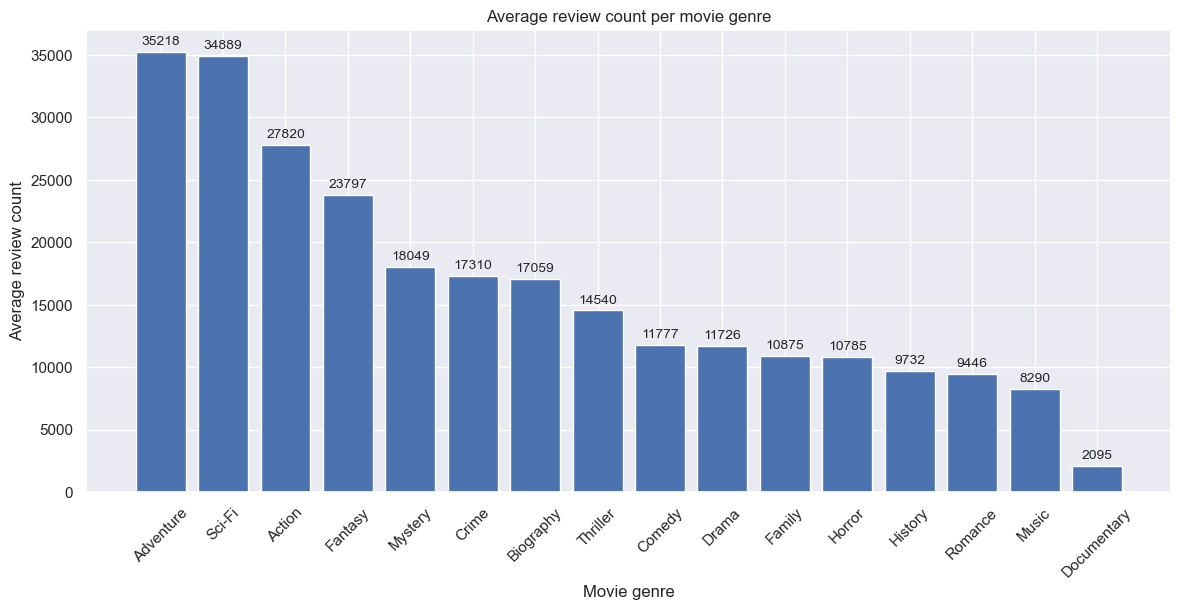

In [72]:
fig, ax = plt.subplots()

fig.set_size_inches(14, 6)

x, y = list(zip(*sorted_mean_reviews))

bars = ax.bar(x, y)

for bar in bars:
    height = bar.get_height()
    ax.annotate(
        round(height),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Movie genre')

ax.set_ylabel('Average review count')

ax.set_title('Average review count per movie genre')

plt.show()

In [73]:
adventure_movie_types = df_per_genre.get_group(genres.index('Adventure')).titleType.value_counts(normalize=True)
documentary_movie_types = df_per_genre.get_group(genres.index('Documentary')).titleType.value_counts(normalize=True)

print('Adventure title types')
print(adventure_movie_types)
print()
print('Documentary title types')
print(documentary_movie_types)

Adventure title types
movie           0.877479
tvMovie         0.122521
short           0.000000
tvEpisode       0.000000
tvMiniSeries    0.000000
tvPilot         0.000000
tvSeries        0.000000
tvShort         0.000000
tvSpecial       0.000000
video           0.000000
videoGame       0.000000
Name: titleType, dtype: float64

Documentary title types
movie           0.754918
tvMovie         0.245082
short           0.000000
tvEpisode       0.000000
tvMiniSeries    0.000000
tvPilot         0.000000
tvSeries        0.000000
tvShort         0.000000
tvSpecial       0.000000
video           0.000000
videoGame       0.000000
Name: titleType, dtype: float64


### 5.8.1 Conclusions

The Adventure genre with **7,623** movies has the most ratings on average with *~31,808* on average.\
The Documentary genre with **6,184** movies has the least ratings on average with *~2114* on average.

One theory could be that although both genres have similar movie counts,\
people are less likely to watch Documentaries as a mean of entertainment,\
thus, less likely to leave a review for such films.

## 5.9 What is the runtime length distribution per genre?

In [74]:
runtime_per_genre = movies_df[['genres', 'runtimeMinutes']].explode('genres').groupby('genres')['runtimeMinutes']
runtime_per_genre = [(genres[x[0]], x[1]) for x in runtime_per_genre]

# sort descending by num movies per genre and discard the ones with least movies
sorted_runtime_per_genre = sorted(runtime_per_genre, key=lambda x: x[1].count(), reverse=True)[:-5]

# sort descending by the mean movie runtime
sorted_runtime_per_genre = sorted(sorted_runtime_per_genre, key=lambda x: x[1].mean(), reverse=True)

keys = [k for k, v in sorted_runtime_per_genre]
values = [v.astype(np.int32) for k, v in sorted_runtime_per_genre]

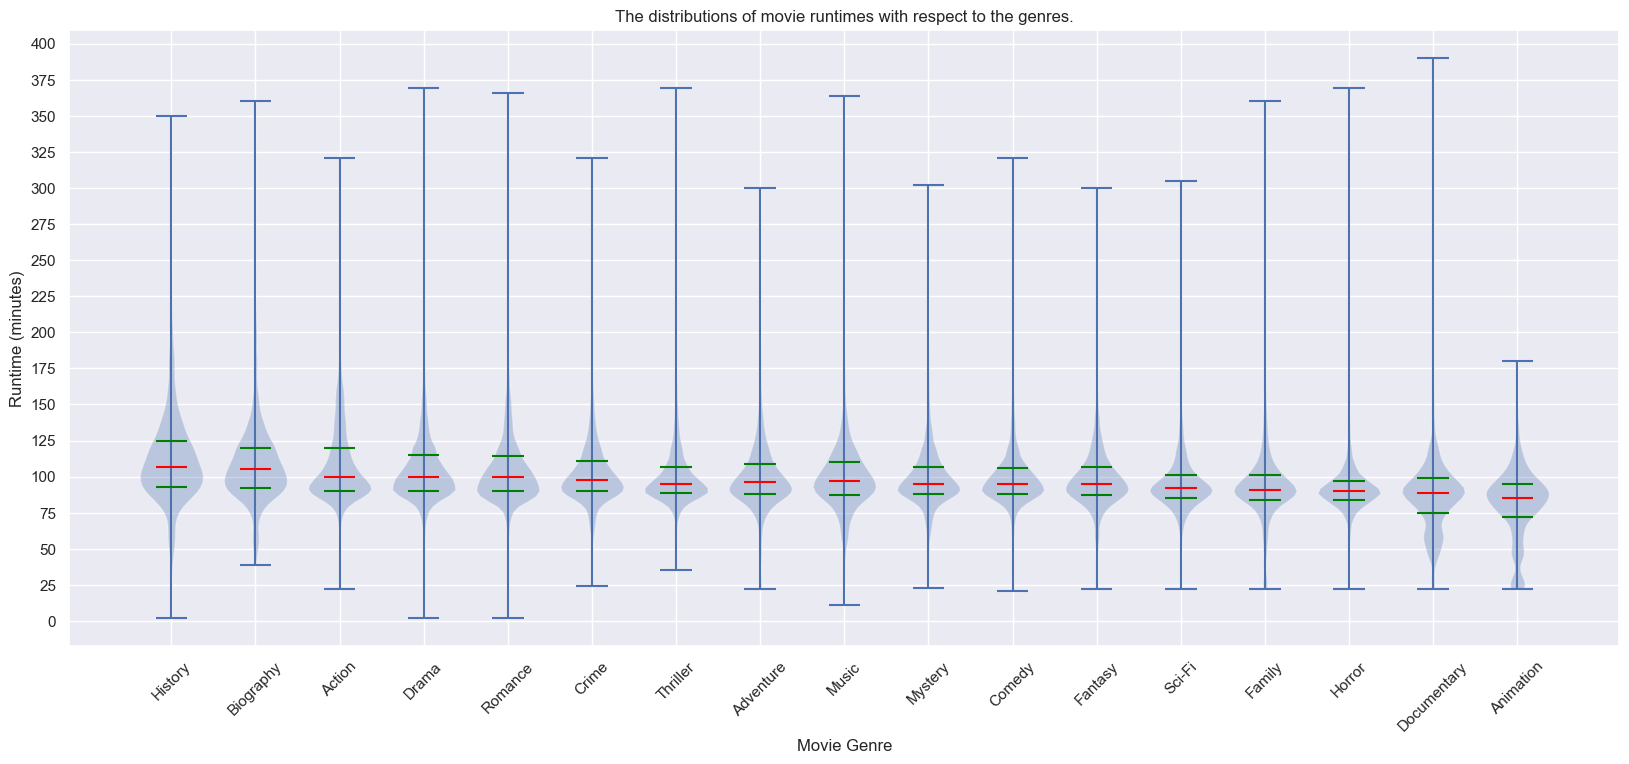

In [75]:
fig, ax = plt.subplots()

fig.set_size_inches(20, 8)

violin_data = ax.violinplot(values, widths=.75, showmedians=True, quantiles=[(0.25, 0.75) for _ in range(len(values))])

violin_data['cmedians'].set_colors(['red'] * len(values))
violin_data['cquantiles'].set_colors(['green'] * len(values))

ax.set_xticks(np.arange(1, len(values) + 1))
ax.set_xticklabels(keys)
ax.tick_params('x', rotation=45)
ax.set_xlabel("Movie Genre")

ax.set_yticks(np.arange(0, 425, 25))
ax.set_ylabel("Runtime (minutes)")

ax.set_title("The distributions of movie runtimes with respect to the genres.")

plt.show()

In [76]:
print("Max")
genre_max = [(x[0], x[1].max()) for x in sorted_runtime_per_genre]
print(max(genre_max, key=lambda x: x[1]))
print(min(genre_max, key=lambda x: x[1]))

print("Means")
genre_mean = [(x[0], x[1].mean()) for x in sorted_runtime_per_genre]
print(max(genre_mean, key=lambda x: x[1]))
print(min(genre_mean, key=lambda x: x[1]))

print("Range")
genre_spread = [(x[0], x[1].max() - x[1].min()) for x in sorted_runtime_per_genre]
print(max(genre_spread, key=lambda x: x[1]))
print(min(genre_spread, key=lambda x: x[1]))

print("Stddev")
genre_std = [(x[0], x[1].std()) for x in sorted_runtime_per_genre]
print(max(genre_std, key=lambda x: x[1]))
print(min(genre_std, key=lambda x: x[1]))

Max
('Documentary', 390)
('Animation', 180)
Means
('History', 113.01588946459412)
('Animation', 80.84773175542406)
Range
('Documentary', 368)
('Animation', 158)
Stddev
('History', 33.427500839872316)
('Horror', 15.216240457390528)


### 5.9.1 Conclusions

Maximum runtime: **Documentary** has the *highest* max runtime (390 mins) and **Film-Noir** has the *lowest* max runtime (135 mins).\
Runtime range: **Documentary** has the *widest* range (368 mins) and **Film-Noir** has the *narrowest* range (80 mins).\
Average runtime: **History** has the *highest* average runtime (112.82 mins) and **Animation** has the *lowest* average runtime (80.85 mins).\
Std deviation: **History** has the *largest* std deviation (33.4 mins) and **Film-Noir** has the *smallest* std deviation (13.61 mins).

## 5.10 Is there a relationship between the movie's directors and its rating?

In [77]:
temp = movies_df[['directors', 'averageRating']].copy()

temp['directorList'] = temp.directors.apply(lambda d: d.strip().split(',') if d is not pd.NA else [pd.NA])
temp.drop(['directors'], axis=1, inplace=True)

temp = temp.explode('directorList')
temp.rename(columns={'directorList': 'director'}, inplace=True)
temp.dropna(how='any', inplace=True)

temp.head()

,averageRating,director
tconst,,
tt0000574,6.0,nm0846879
tt0002101,5.1,nm0309130
tt0002130,7.0,nm0078205
tt0002130,7.0,nm0655824
tt0002130,7.0,nm0209738


### 5.10.1 How many movies does a director direct?

In [78]:
movies_per_director = temp.director.value_counts()
values = movies_per_director.values

bins = np.arange(1, values.max() + 10, 10)

values = np.digitize(values, bins)
values = bins[values - 1]

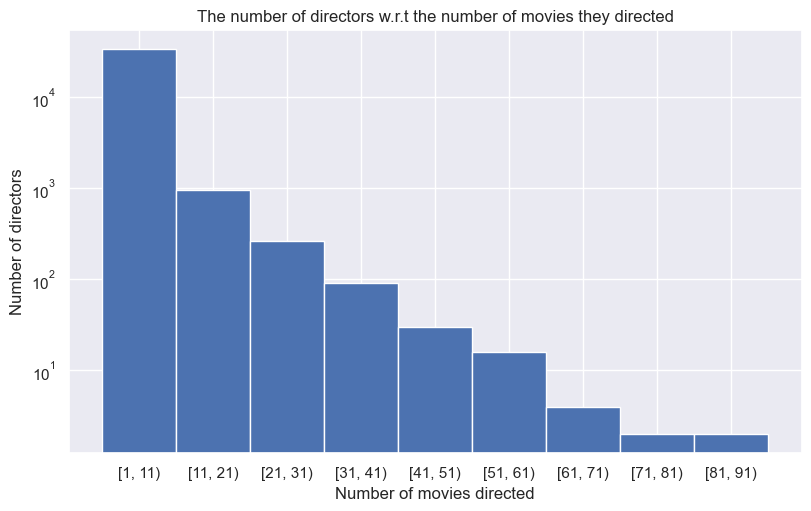

In [79]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(8, 5)

ax.hist(values, bins=bins, align='left')

ax.set_xticks(bins[:-1], [f'[{v}, {bins[i + 1]})' for i, v in enumerate(bins[:-1])])
ax.set_xlabel("Number of movies directed")

ax.set_yscale('log')
ax.set_ylabel('Number of directors')

ax.set_title('The number of directors w.r.t the number of movies they directed')

plt.show()

In [80]:
values = movies_per_director.values
movies_per_director_iqr = np.quantile(values, .75) - np.quantile(values, .25)

print('Mean {}, min: {}, max: {}'.format(values.mean(), values.min(), values.max()))
print('1st quartile: {}, median: {}, 3rd quartile: {}, 99th percentile: {}'.format(np.quantile(values, .25), np.median(values), np.quantile(values, .75), np.quantile(values, .99)))

Mean 2.6502913286873073, min: 1, max: 89
1st quartile: 1.0, median: 1.0, 3rd quartile: 2.0, 99th percentile: 22.0


#### 5.10.1.1 Conclusions

The average number of movies a director directs is **2.65**, with the minimum being **1** and the maximum **89**.\
From this dataset *50%* of directors directed **1** movie with *75%* directing at most **2** movies and *99%* directing less than **23** movies.

### 5.10.2 Do directors that directed more movies tend to produce better rated movies overall?

In [81]:
movies_by_director = temp.groupby('director')

directors = pd.DataFrame()
directors['numDirectedMovies'] = movies_by_director.averageRating.count()
directors['averageRating'] = movies_by_director.averageRating.mean().round(1)

directors.head()

,numDirectedMovies,averageRating
director,,
nm0000005,55,7.1
nm0000008,1,7.1
nm0000009,1,5.4
nm0000018,2,5.8
nm0000019,23,7.3


In [82]:
directors.describe()

,numDirectedMovies,averageRating
count,35012.000000,35012.00000
mean,2.650291,5.93402
std,4.166496,1.28943
min,1.000000,1.00000
25%,1.000000,5.20000
50%,1.000000,6.10000
75%,2.000000,6.80000
max,89.000000,9.90000


"numDirectedMovies" is an integer discrete variable ranging from 1 to 89\
"averageRating" is a decimal discrete variable ranging from 1 to 10 in increments of 0.1

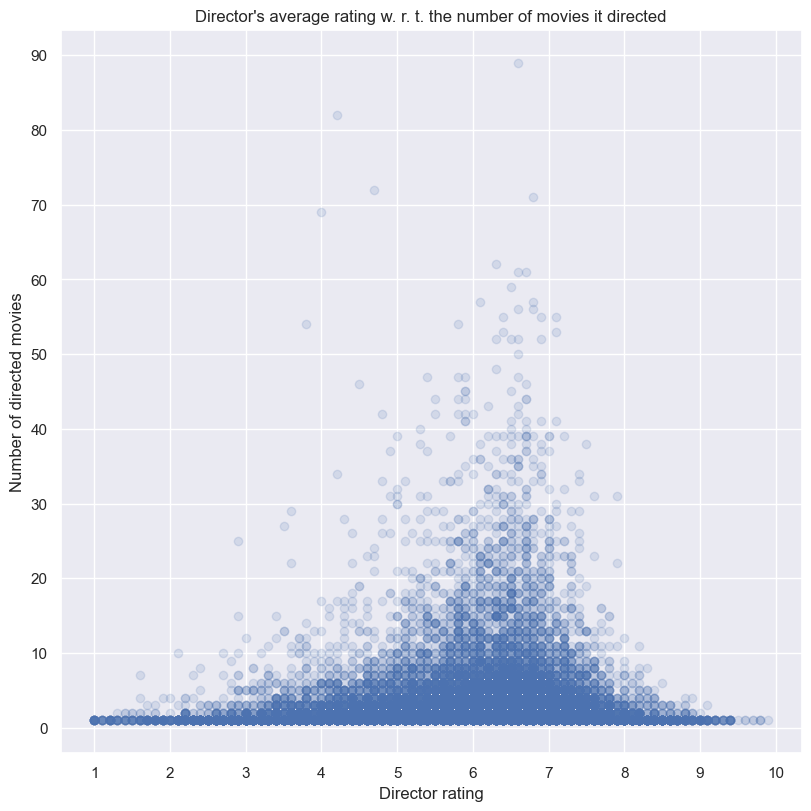

In [83]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(8, 8)

ax.scatter(directors.averageRating, directors.numDirectedMovies, alpha=.15)

ax.set_xticks(np.arange(1, 11, 1))
ax.set_xlabel("Director rating")

ax.set_yticks(np.arange(0, 100, 10))
ax.set_ylabel("Number of directed movies")

ax.set_title("Director's average rating w. r. t. the number of movies it directed")
plt.show()

Since we want to see if there's a difference in "averageRating" w. r. t. the change in "numDirectedMovies" we'll perform a chi-squared test for these 2 variables.\
The null hypothesis of the test is that the variables are independent (there is no relationship between them).

In [84]:
cross_tab_result = pd.crosstab(directors.numDirectedMovies, directors.averageRating)

In [85]:
_, p_value, _, expected = stats.chi2_contingency(cross_tab_result)

print(f'P-value is: {p_value}')

print(f'Percentage of entries in the contingency table with freq. < 5: {(expected < 5).sum() / np.prod(expected.shape) * 100:.2f}%')

P-value is: 0.2936008842967876
Percentage of entries in the contingency table with freq. < 5: 91.45%


In [86]:
mc_chisquared(cross_tab_result)

0.0004997501249375312

In [87]:
cramers_v(directors.numDirectedMovies, directors.averageRating)

0.0051017989243265375

Further, we can check if there's a correlation between "numDirectedMovies" and "averageRating".\
For that we'll use Kendall's tau-b coeff.\
Unlike Spearman's r coeff. this coeff. takes into account ties in the data.

In [88]:
stats.kendalltau(directors.numDirectedMovies, directors.averageRating)

KendalltauResult(correlation=0.03897650741129784, pvalue=1.2666891882001402e-21)

#### 5.10.2.1 Conclusions

Since the ratings w. r. t. the number of movies a writer wrote is a sparse table we've applied the Monte Carlo version of the Chi-Squared test.\
We got a correlation of $r = 0.0049$ and a p-value of $p = 5 \cdot 10^{-4}$ between the director's rating and the number of movies it directed.

Further, performing the Kendall's tau-b test we get a correlation coeff of $0.038$ and a p-value of $p = 6.21 \cdot 10^{-21}$.

This means that the little correlation we get from these variables is indeed statistically significant, on a significance level of < 1% ($\alpha < 0.01$).

## 5.11 Is there a relationship between the movie's writers and its rating?

In [89]:
temp = movies_df[['writers', 'averageRating']].copy()
temp['writersList'] = temp.writers.map(lambda x: x.strip().split(',') if x is not pd.NA else [x])

temp.drop(columns=['writers'], inplace=True)

temp = temp.explode('writersList')
temp.rename(columns={'writersList': 'writer'}, inplace=True)
temp.dropna(how='any', inplace=True)

temp.head()

,averageRating,writer
tconst,,
tt0000574,6.0,nm0846879
tt0002101,5.1,nm0765026
tt0002101,5.1,nm0309130
tt0002130,7.0,nm0019604
tt0002199,5.8,nm0310155


### 5.11.1 How many movies does a writer write?

In [90]:
grouped = temp.groupby('writer')

writers = pd.DataFrame()
writers['movieCount'] = grouped.averageRating.count()
writers['averageRating'] = grouped.averageRating.mean().round(1)

writers.head()

,movieCount,averageRating
writer,,
nm0000005,50,7.2
nm0000018,1,5.1
nm0000019,32,7.3
nm0000027,1,7.0
nm0000031,1,8.3


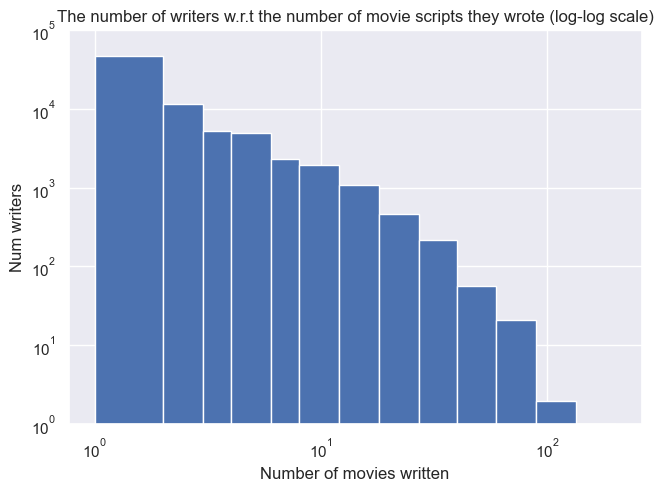

In [91]:
fig, ax = plt.subplots(layout='constrained')

geom_bins = np.ceil(np.geomspace(1, 200, num=14)).astype(int)

ax.hist(writers.movieCount, bins=geom_bins)

ax.set_yscale('log')
ax.set_ylim(1, 100000)
ax.set_ylabel('Num writers')

ax.set_xscale('log')
ax.set_xlabel('Number of movies written')

ax.set_title('The number of writers w.r.t the number of movie scripts they wrote (log-log scale)')

plt.show()

In [92]:
values = writers.movieCount
movies_per_writer_iqr = np.quantile(values, .75) - np.quantile(values, .25)

print(values.mean().round(2), values.min(), values.max())
print(np.quantile(values, .25), np.median(values), np.quantile(values, .75), np.quantile(values, .99))

2.36 1 180
1.0 1.0 2.0 18.0


#### 5.11.1.1 Conclusions

The average number of movies a writer writes is **2.36**, with the minimum being **1** and the maximum **180**.\
From this dataset *50%* of writers wrote **1** movie with *75%* writing at most **2** movies and *99%* writing less than **19** movies.

### 5.11.2 Do writers that wrote multiple movies tend to write better movies overall?

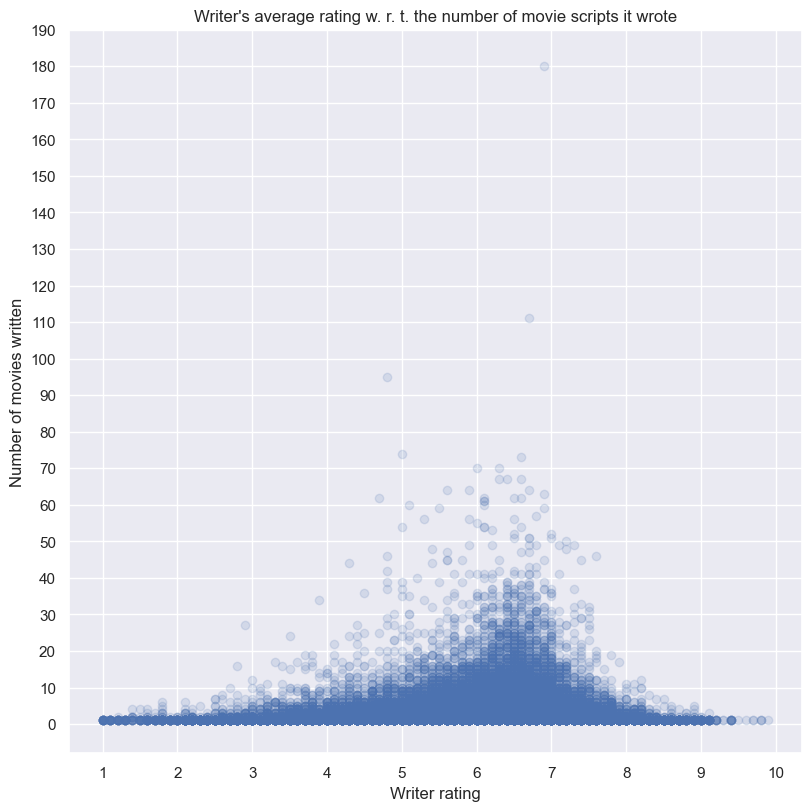

In [93]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(8, 8)

ax.scatter(writers.averageRating, writers.movieCount, alpha=.15)

ax.set_xticks(np.arange(1, 11, 1))
ax.set_xlabel("Writer rating")

ax.set_yticks(np.arange(0, 200, 10))
ax.set_ylabel("Number of movies written")

ax.set_title("Writer's average rating w. r. t. the number of movie scripts it wrote")

plt.show()

In [94]:
cross_tab_result = pd.crosstab(writers.averageRating, writers.movieCount)

In [95]:
p_value = mc_chisquared(cross_tab_result)
p_value

0.0004997501249375312

In [96]:
cramers_v(writers.averageRating, writers.movieCount)

0.020417763198737844

In [97]:
stats.kendalltau(writers.averageRating, writers.movieCount)

KendalltauResult(correlation=0.03488742271252903, pvalue=4.4474236118122087e-35)

#### 5.11.2.1 Conclusions

Since the ratings w. r. t. the number of movies a writer wrote is a sparse table we've applied the Monte Carlo version of the Chi-Squared test.\
We got a correlation of $r = 0.02$ and a p-value of $p = 0.00005$ between the writer's rating and the number of movies it wrote.

While this correlation is small, it is indeed statistically significant, on a significance level of < 1% ($\alpha < 0.01$).

## 5.12 Is the movie's rating correlated with the number of reviews?

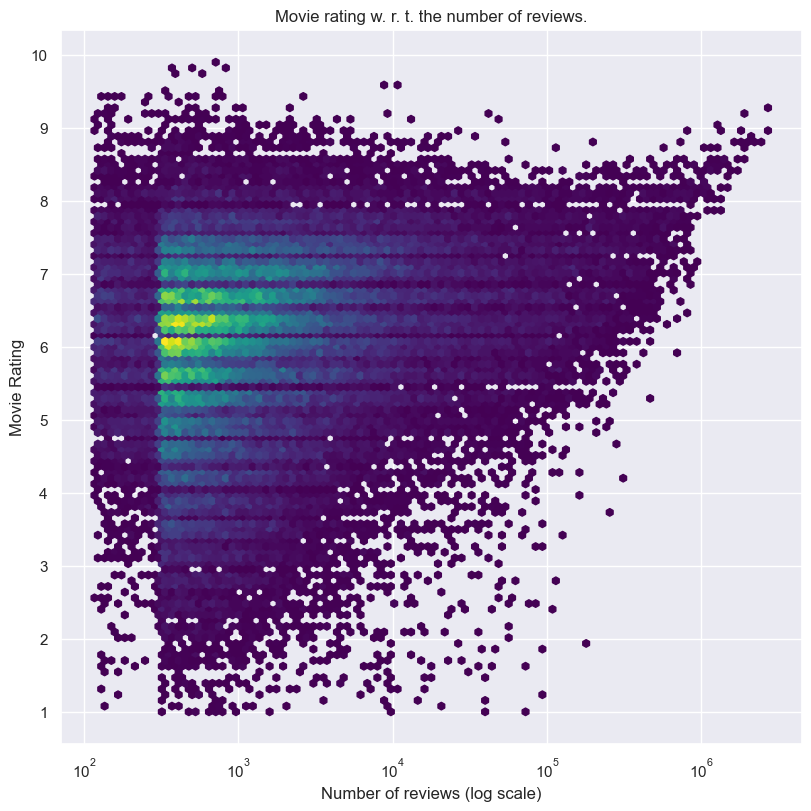

In [98]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(8, 8)

ax.hexbin(movies_df.numVotes, movies_df.averageRating, xscale='log', cmap='viridis', mincnt=1)

ax.set_xlabel("Number of reviews (log scale)")

ax.set_yticks(np.linspace(1, 10, 10))
ax.set_ylabel("Movie Rating")

ax.set_title("Movie rating w. r. t. the number of reviews.")

plt.show()

In [99]:
res = smf.ols(formula='averageRating ~ np.log10(numVotes)', data=movies_df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3977.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        23:54:31   Log-Likelihood:            -1.3457e+05
No. Observations:               83638   AIC:                         2.692e+05
Df Residuals:                   83636   BIC:                         2.692e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8502      0

In [100]:
x = np.arange(movies_df.numVotes.min(), movies_df.numVotes.max(), 100)
yhat = res.predict({'numVotes': x})

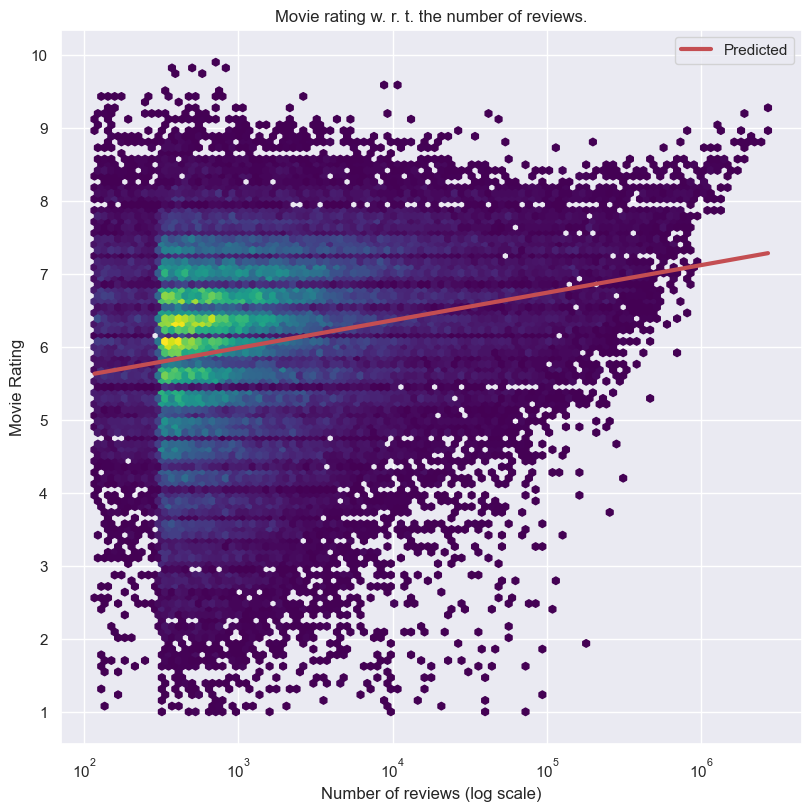

In [101]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(8, 8)

ax.plot(x, yhat, color='r', linewidth=3, label='Predicted')
ax.hexbin(movies_df.numVotes, movies_df.averageRating, xscale='log', cmap='viridis', mincnt=1)

ax.set_xlabel("Number of reviews (log scale)")

ax.set_yticks(np.linspace(1, 10, 10))
ax.set_ylabel("Movie Rating")

ax.legend()

ax.set_title("Movie rating w. r. t. the number of reviews.")

plt.show()

In [102]:
stats.kendalltau(np.log10(movies_df.numVotes), movies_df.averageRating)

KendalltauResult(correlation=0.13588084064841546, pvalue=0.0)

### 5.12.1 Conclusions

A tail can be observed on the scatterplot between $10^5$ and $10^6$ but, overall, the plot doesn't show a correlation between the features.

Fitting a linear model between the **averageRating** and the *log10* of **numVotes** gives an R-squared of $R^2 = 0.045$.\
Given the small value of $R^2$ we conclude that a linear model between these 2 variables is a poor estimator.

The linear model has an intercept ($\beta$) of $4.8523$ and the weight for the log10(numVotes) ($w_0$) is $0.3780$.

Model's p-value: 0.00

Coefficients:\
Intercept (val: 4.8523, std err: 0.020, p-value: 0.000)\
np.log10(numVotes) (val: 0.3780, std err: 0.006, p-value: 0.000)

To asses the correlation of these two variables and account for ties in the data we used **Kendall's tau b test**.\
From the test we got a correlation coeff. $\tau = 0.135$ and a p-value $p = 0.0$.

This means that there's little correlation between the number of ratings and the movie's rating but it's statistically significant.

## 5.13 Is the movie's rating correlated with the movie runtime?

In [103]:
# We need to do this transform since statsmodels' patsy (the package used for R-like formulas) doesn't work with pandas data types

movies_df['runtimeMinutes'] = movies_df.runtimeMinutes.astype(int)

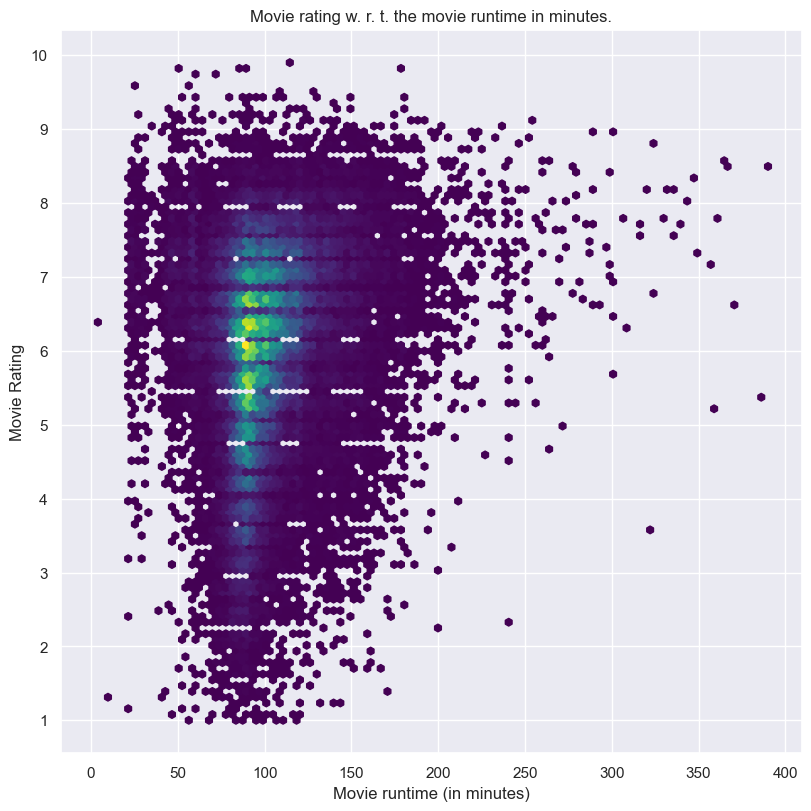

In [104]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(8, 8)

ax.hexbin(movies_df.runtimeMinutes, movies_df.averageRating, cmap='viridis', mincnt=1)

ax.set_xlabel("Movie runtime (in minutes)")

ax.set_yticks(np.linspace(1, 10, 10))
ax.set_ylabel("Movie Rating")

ax.set_title("Movie rating w. r. t. the movie runtime in minutes.")

plt.show()

In [105]:
res = smf.ols(formula='averageRating ~ runtimeMinutes', data=movies_df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3027.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        23:54:34   Log-Likelihood:            -1.3503e+05
No. Observations:               83638   AIC:                         2.701e+05
Df Residuals:                   83636   BIC:                         2.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.0769      0.018    278.

In [106]:
x = np.arange(movies_df.runtimeMinutes.min(), movies_df.runtimeMinutes.max(), 1)
yhat = res.predict({'runtimeMinutes': x})

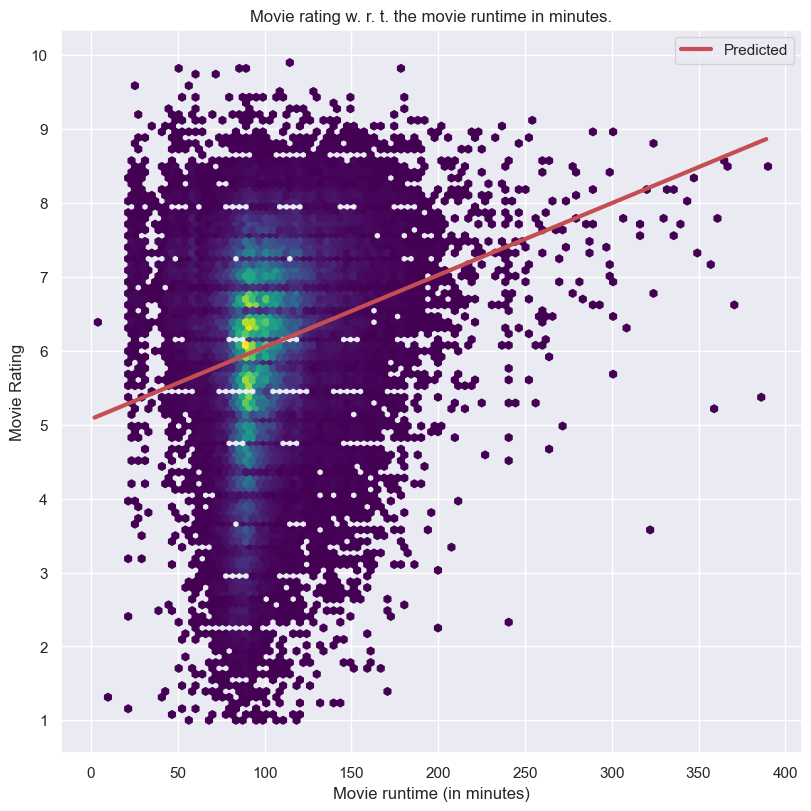

In [107]:
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(8, 8)

ax.plot(x, yhat, color='r', linewidth=3, label='Predicted')
ax.hexbin(movies_df.runtimeMinutes, movies_df.averageRating, cmap='viridis', mincnt=1)

ax.set_xlabel("Movie runtime (in minutes)")

ax.set_yticks(np.linspace(1, 10, 10))
ax.set_ylabel("Movie Rating")

ax.legend()

ax.set_title("Movie rating w. r. t. the movie runtime in minutes.")

plt.show()

In [108]:
stats.kendalltau(movies_df.runtimeMinutes, movies_df.averageRating)

KendalltauResult(correlation=0.15660947000536654, pvalue=0.0)

### 5.13.1 Conclusions

The scatterplot shows larger spreads between the movie runtime of those with higher ratings.\
Based on the plot, the movies with higher runtimes seem to be outliers and the features seem to be uncorrelated,\
the plot can be represented as a vertical line at $x \approx 80\ \texttt{mins}$.

Fitting a linear model between the **averageRating** and the **runtimeMinutes** gives an R-squared of $0.035$.\
This shows that a linear model is a poor fit and implies that the relationship (if there's any) is likely non-linear.

The linear model has an intercept ($\beta$) of $5.0815$ and the weight for the **runtimeMinutes** ($w_0$) is $0.0097$.\
This means that an increase of 1 minute in the movie's runtime corresponds to an increase of $0.0097$ in the movie's rating.

Model's p-value: 0.00

Coefficients:\
Intercept (val: 5.0815, std err: 0.018, p-value: 0.000)\
runtimeMinutes (val: 0.0097, std err: 0.000, p-value: 0.000)

Computing the correlation using **Kendall's tau-b test** (to account for ties in the data) between these two variables we get 
a correlation coeff. $\tau = 0.155$ and a p-value $p = 0.0$.

## 5.14 Is there a correlation between the release year and the movie rating?

In [109]:
temp = movies_df[['startYear', 'averageRating']].copy()
temp.head()

,startYear,averageRating
tconst,,
tt0000574,1906,6.0
tt0002101,1912,5.1
tt0002130,1911,7.0
tt0002199,1912,5.8
tt0002423,1919,6.6


In [110]:
# Filter out the data for the years that don't have enough samples to be significant

movies_per_year = temp.startYear.value_counts()
min_year = movies_per_year[movies_per_year > 90].index.min()

min_year

1929

In [111]:
temp = temp[temp.startYear >= min_year]
temp

,startYear,averageRating
tconst,,
tt0016029,1935,7.0
tt0017961,1935,7.3
tt0018362,1929,6.2
tt0018737,1929,7.8
tt0018908,1929,7.0
...,...,...
tt9908390,2020,5.4
tt9911196,2020,7.5
tt9911774,2019,8.2


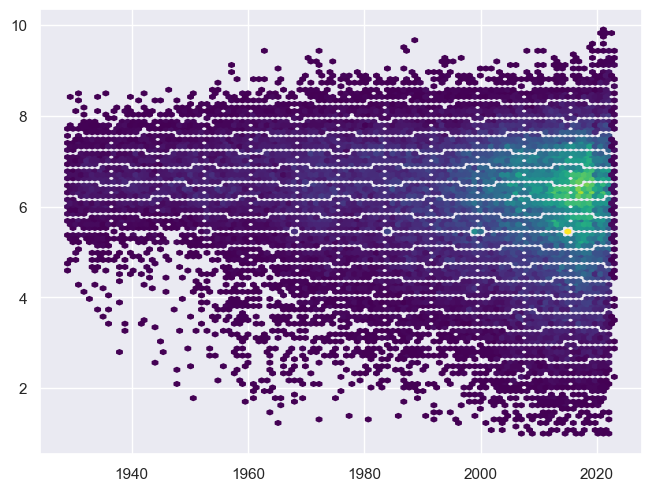

In [112]:
fig, ax = plt.subplots(layout='constrained')

ax.hexbin(temp.startYear, temp.averageRating, cmap='viridis', mincnt=1)

plt.show()

In [113]:
decade_bins = np.arange(temp.startYear.min(), temp.startYear.max() + 10, 10)
decades = pd.cut(temp.startYear, decade_bins, right=False, include_lowest=True)

cross_tab_result = pd.crosstab(decades, temp.averageRating)

In [114]:
_, p_value, _, expected = stats.chi2_contingency(cross_tab_result)

print(f'P-value is: {p_value}')

print(f'Percentage of entries in the contingency table with freq. < 5: {(expected < 5).sum() / np.prod(expected.shape) * 100:.2f}')

P-value is: 0.0
Percentage of entries in the contingency table with freq. < 5: 26.00


In [115]:
mc_chisquared(cross_tab_result)

0.0004997501249375312

In [116]:
cramers_v(decades, temp.averageRating)

0.06789411511100421

In [117]:
stats.kendalltau(temp.startYear, temp.averageRating)

KendalltauResult(correlation=-0.09047329263000288, pvalue=0.0)

### 5.14.1 Conclusions

We've grouped the data by decade, starting from 1929 and performed Pearson's $\chi^2$ test to see whether
there's a dependence between the decade the movie was released and it's rating.\
We get a p-value close to 0 but there's $\approx 26$% of entries that have a freq < 5 so the test cannot be reliably used.\
Performing a Monte-Carlo variation of the $\chi^2$ test we get a p-value of 0.0005 and computing the Cramer's V coefficient yields a correlation of $\approx 0.068$.\
This means that although there's very little correlation between the movie's release year and its rating, it is significant.

Computing the correlation between the movie's release year and it's rating we get a corr. coeff. $\tau = -0.09$ and a p-value of 0.0.\
Although being negligible it's statistically significant and it strengthens what we've seen in [Section 5.3](#movie_ratings_per_year)

### 5.14.2 What about since IMDB was launched?

In [118]:
temp = temp[temp.startYear >= 1990]

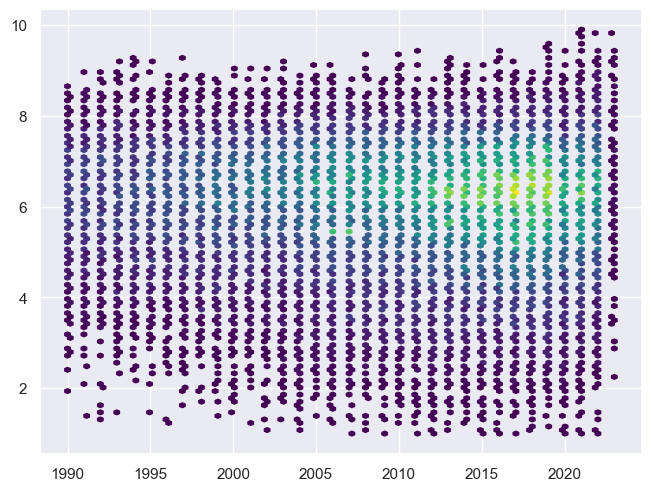

In [119]:
fig, ax = plt.subplots(layout='constrained')

ax.hexbin(temp.startYear, temp.averageRating, cmap='viridis', mincnt=1)

plt.show()

In [120]:
decade_bins = np.arange(temp.startYear.min(), temp.startYear.max() + 10, 10)
decades = pd.cut(temp.startYear, decade_bins, right=False, include_lowest=True)

cross_tab_result = pd.crosstab(decades, temp.averageRating)

In [121]:
_, p_value, _, expected = stats.chi2_contingency(cross_tab_result)

print(f'P-value is: {p_value}')

print(f'Percentage of entries in the contingency table with freq. < 5: {(expected < 5).sum() / np.prod(expected.shape) * 100:.2f}')

P-value is: 4.036672973617724e-43
Percentage of entries in the contingency table with freq. < 5: 15.28


In [122]:
mc_chisquared(cross_tab_result)

0.0004997501249375312

In [123]:
cramers_v(decades, temp.averageRating)

0.04958259242395379

In [124]:
stats.kendalltau(temp.startYear, temp.averageRating)

KendalltauResult(correlation=-0.022606147947318415, pvalue=3.515455580157505e-16)

#### 5.14.2.1 Conclusions

The results we got in this experiment are very similar to the results before.

From the Pearson's $\chi^2$ test we got a p-value close to 0 but there's $\approx 15$% of entries that have a freq < 5
so the test cannot be reliably used.\
Performing a Monte-Carlo variation of the $\chi^2$ test we get a p-value of 0.0005 and computing the Cramer's V coefficient yields a correlation of $\approx 0.049$.

So although there's very little correlation between the movie's release year and its rating, it is significant.

Computing the correlation this time yields a smaller value $\tau = -0.02$ that's still statistically significant with a p-value of $8.7 \cdot 10^{-16}$.\
This implies that there's "less" correlation between the data in the last 2 decades than in the overall data.

## 5.15 What factors influence a movie's rating?

In [125]:
temp_movies_df = movies_df.copy()

len(temp_movies_df)

83638

In [126]:
lower_genres = [genre.replace('-', '_').lower() for genre in genres]
lower_genres

['<no genre>',
 'action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film_noir',
 'game_show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality_tv',
 'romance',
 'sci_fi',
 'short',
 'sport',
 'talk_show',
 'thriller',
 'war',
 'western']

In [127]:
def one_hot_encode(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[f'{item}_genre'] = item_lists.apply(lambda x: item in [lower_genres[i] for i in x]).astype(int)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [128]:
unique_genres = [lower_genres[i] for i in temp_movies_df.genres.explode().unique()]
unique_genres

['action',
 'adventure',
 'biography',
 'drama',
 'history',
 'fantasy',
 'romance',
 'crime',
 'mystery',
 'horror',
 'comedy',
 'family',
 'war',
 'sci_fi',
 'documentary',
 'western',
 'thriller',
 'sport',
 'animation',
 'music',
 'musical',
 'film_noir']

In [129]:
one_hot_genres = one_hot_encode(temp_movies_df.genres, unique_genres)
one_hot_genres.head()

,action_genre,adventure_genre,biography_genre,drama_genre,history_genre,fantasy_genre,romance_genre,crime_genre,mystery_genre,horror_genre,...,war_genre,sci_fi_genre,documentary_genre,western_genre,thriller_genre,sport_genre,animation_genre,music_genre,musical_genre,film_noir_genre
tconst,,,,,,,,,,,,,,,,,,,,,
tt0000574,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0002101,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0002130,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0002199,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0002423,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
temp_movies_df = temp_movies_df.join(one_hot_genres)
temp_movies_df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,averageRating,...,war_genre,sci_fi_genre,documentary_genre,western_genre,thriller_genre,sport_genre,animation_genre,music_genre,musical_genre,film_noir_genre
tconst,,,,,,,,,,,,,,,,,,,,,
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,70,"(1, 3, 5)",nm0846879,nm0846879,6.0,...,0,0,0,0,0,0,0,0,0,0
tt0002101,movie,Cleopatra,Cleopatra,False,1912,100,"(9, 14)",nm0309130,"nm0765026,nm0309130",5.1,...,0,0,0,0,0,0,0,0,0,0
tt0002130,movie,Dante's Inferno,L'Inferno,False,1911,71,"(3, 9, 11)","nm0078205,nm0655824,nm0209738",nm0019604,7.0,...,0,0,0,0,0,0,0,0,0,0
tt0002199,movie,From the Manger to the Cross,From the Manger to the Cross,False,1912,60,"(5, 9)",nm0646058,nm0310155,5.8,...,0,0,0,0,0,0,0,0,0,0
tt0002423,movie,Passion,Madame DuBarry,False,1919,85,"(5, 9, 21)",nm0523932,"nm0266183,nm0473134",6.6,...,0,0,0,0,0,0,0,0,0,0


In [131]:
temp_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83638 entries, tt0000574 to tt9916362
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   titleType          83638 non-null  category
 1   primaryTitle       83638 non-null  object  
 2   originalTitle      83638 non-null  object  
 3   isAdult            83638 non-null  bool    
 4   startYear          83638 non-null  Int32   
 5   runtimeMinutes     83638 non-null  int32   
 6   genres             83638 non-null  object  
 7   directors          83390 non-null  string  
 8   writers            80520 non-null  string  
 9   averageRating      83638 non-null  float64 
 10  numVotes           83638 non-null  int64   
 11  action_genre       83638 non-null  int32   
 12  adventure_genre    83638 non-null  int32   
 13  biography_genre    83638 non-null  int32   
 14  drama_genre        83638 non-null  int32   
 15  history_genre      83638 non-null  int32   
 1

In [133]:
temp_movies_df['startYear'] = temp_movies_df.startYear.astype(int)
temp_movies_df['runtimeMinutes'] = temp_movies_df.runtimeMinutes.astype(int)

In [134]:
# Since the startYear's min is ~1920 we'll get an error saying "The condition number is large, 1.03e+04. etc.."
# https://stats.stackexchange.com/questions/243000/cause-of-a-high-condition-number-in-a-python-statsmodels-regression

temp_movies_df['startYear'] -= temp_movies_df.startYear.mean()

In [135]:
genre_columns = [col for col in temp_movies_df.columns if col.endswith('_genre')]

In [136]:
# Drop genres that don't have any correlation

genre_corr = temp_movies_df[[*genre_columns]].corr('spearman')
genre_columns = genre_corr.dropna(how='all', axis=1).columns.values

In [137]:
formula = 'averageRating ~ startYear + runtimeMinutes + np.log10(numVotes) + ' + ' + '.join(genre_columns)
formula

'averageRating ~ startYear + runtimeMinutes + np.log10(numVotes) + action_genre + adventure_genre + biography_genre + drama_genre + history_genre + fantasy_genre + romance_genre + crime_genre + mystery_genre + horror_genre + comedy_genre + family_genre + war_genre + sci_fi_genre + documentary_genre + western_genre + thriller_genre + sport_genre + animation_genre + music_genre + musical_genre + film_noir_genre'

In [138]:
res = smf.ols(formula=formula, data=temp_movies_df).fit()

In [139]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     1947.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        23:55:47   Log-Likelihood:            -1.1733e+05
No. Observations:               83638   AIC:                         2.347e+05
Df Residuals:                   83612   BIC:                         2.349e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.7106      0

In [140]:
insignificant_genres = ['mystery_genre', 'family_genre', 'war_genre', 'music_genre', 'musical_genre']

formula = 'averageRating ~ startYear + runtimeMinutes + np.log10(numVotes) + ' + ' + '.join(filter(lambda x: x not in insignificant_genres, genre_columns))
formula

'averageRating ~ startYear + runtimeMinutes + np.log10(numVotes) + action_genre + adventure_genre + biography_genre + drama_genre + history_genre + fantasy_genre + romance_genre + crime_genre + horror_genre + comedy_genre + sci_fi_genre + documentary_genre + western_genre + thriller_genre + sport_genre + animation_genre + film_noir_genre'

In [141]:
res = smf.ols(formula=formula, data=temp_movies_df).fit()

In [142]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     2434.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        23:55:49   Log-Likelihood:            -1.1733e+05
No. Observations:               83638   AIC:                         2.347e+05
Df Residuals:                   83617   BIC:                         2.349e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.7095      0

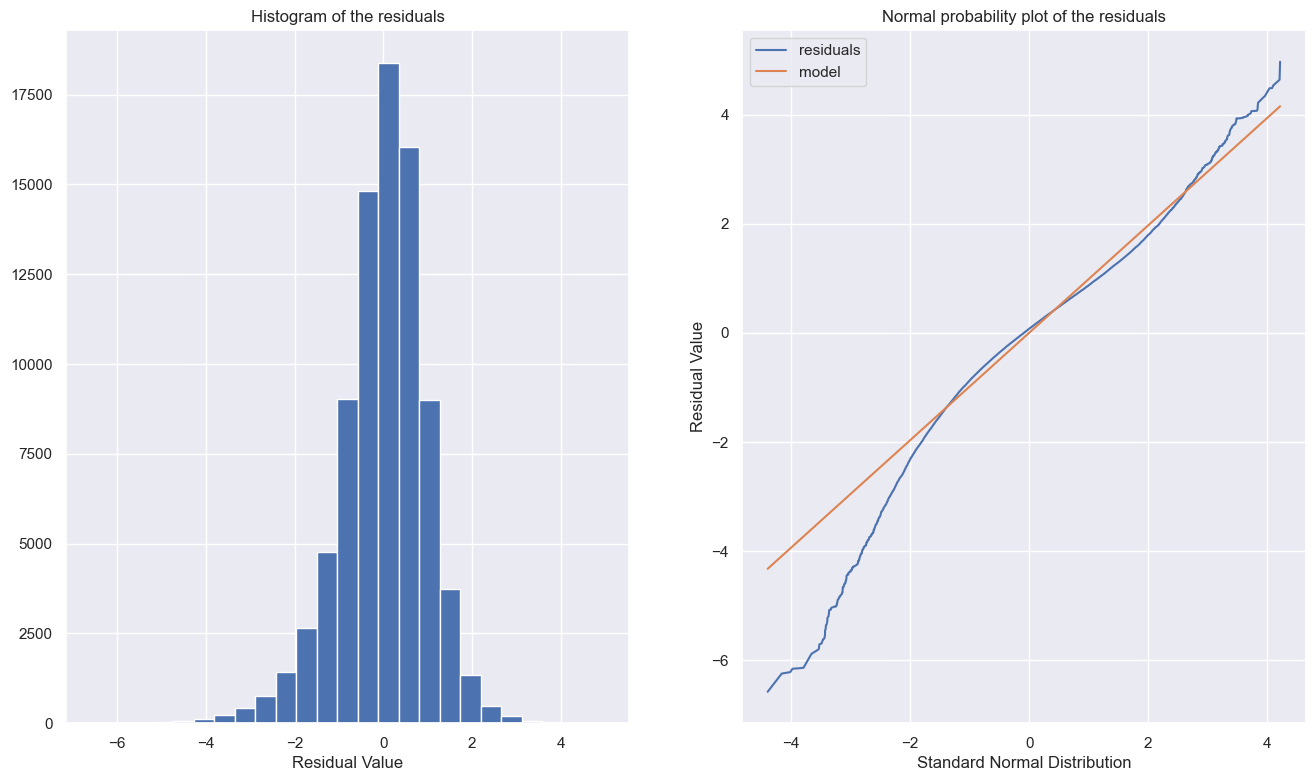

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(16, 9)

residuals = res.resid.values
residuals.sort()

res_mean = residuals.mean()
res_std = residuals.std()

ax1.hist(residuals, bins=25)

ax1.set_xlabel("Residual Value")

ax1.set_title("Histogram of the residuals")

std_norm = np.random.normal(0, 1, size=len(residuals))
std_norm.sort()

ax2.plot(std_norm, residuals, label='residuals')
ax2.plot(std_norm, std_norm * res_std + res_mean, label='model')

ax2.set_xlabel("Standard Normal Distribution")
ax2.set_ylabel("Residual Value")

ax2.legend()
ax2.set_title("Normal probability plot of the residuals")

plt.show()

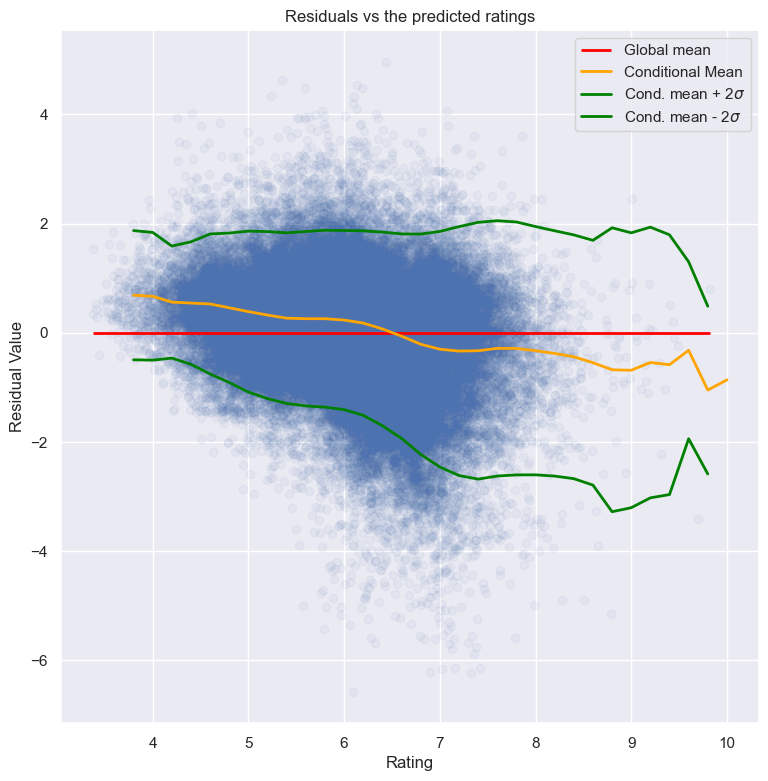

In [144]:
fig, ax = plt.subplots()

fig.set_size_inches(9, 9)

ax.scatter(res.fittedvalues, res.resid, alpha=0.05)
ax.hlines(res.resid.mean(), res.fittedvalues.min(), res.fittedvalues.max(), colors='red', linewidth=2, label='Global mean')

bins = np.arange(1, 10.1, .2)
intervals = pd.cut(res.fittedvalues, bins, right=False, include_lowest=True)
groups = res.resid.groupby(intervals)
means = groups.mean().rolling(3, closed='both').mean()
stds = groups.std().rolling(3, closed='both').mean()

x = means.index.map(lambda x: x.right)

ax.plot(x, means, color='orange', linewidth=2, label='Conditional Mean')
ax.plot(x, means + 2 * stds, color='green', linewidth=2, label='Cond. mean + 2$\sigma$')
ax.plot(x, means - 2 * stds, color='green', linewidth=2, label='Cond. mean - 2$\sigma$')

ax.legend()

ax.set_ylabel("Residual Value")

ax.set_xlabel("Rating")

ax.set_title("Residuals vs the predicted ratings")

plt.show()

### 5.15.1 Conclusions

We've used \[startTime, runtimeMinutes, log10(numVotes)\] and the 1-hot encoded **genres** to fit a linear model for the **averageRating**.\
The model is statistically significant $p=0.0$ and the same is true for most of its parameters.\
The parameters that aren't significant $p > 0.05$ are: \[mystery_genre, family_genre, war_genre, music_genre, musical_genre\].\
A likely explanation for this is that they might have a high correlation with other genres or with a combination of them (e.g war being correlated with drama/action/documentary).

The histogram plot of the residuals shows that they seem to follow a normal distribution.\
From the normal probability plot we can see that residuals on the negative side (residuals up to -2) deviate from those of a normal distribution.

To aid our analysis we've done a "residuals vs predicted plot". The global residual mean is 0, this signifies that the errors are centered around 0.\
The conditional mean (mean of the residuals w.r.t the rating) doesn't follow the global mean.\
This means that linear regression might not be a good model for our data.

The resulting model has an $R^2 = 0.368$ so about **36.8%** of the variance in the averageRating is explained by the linear model.